<h1 align="center">            Liver Cirrhosis Survival Prediction </h1>

 <img src="https://scienceblog.com/wp-content/uploads/2014/12/HiRes.jpg" height="600" width="600" style="object-fit: cover;">



---



<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 15px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-color :  #581845  ;        
    border: 2px solid #581845;">
    
Liver cirrhosis : A complication that happens with a body organ, liver. Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption.

# **Problem Statement**

The task is to develop a multi-class classification model to predict the outcomes of patients with cirrhosis. The model should predict the probabilities for each of the three possible outcomes: Status_C (censored), Status_CL (censored due to liver transplant), and Status_D (deceased). 

# **Objective**

The objective is to accurately predict the probability of each patient’s outcome (Status_C, Status_CL, Status_D) based on the given features in the dataset. The model’s performance will be evaluated using the multi-class logarithmic loss. 

# <center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px"> </p>   </span></font></center>

# Table of Contents

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 15px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-color :  #581845  ;        
    border: 2px solid #581845;">

- [About the dataset](#1)
    - [1.1 Dataset Description](#1.1)
- [2. Importing the data](#2)
    - [2.1 Columns creation](#2.1)
- [3. Exploratory Data Analysis](#3)
    - [3.1 Distribution of Features](#3.1)
    - [3.2 Insights](#3.2)
- [4. Preprocessing](#4)
    - [4.1 RobustScaler](#4.1)  
    - [4.2 One Hot Encoding](#4.2)
- [5. Model Training](#5)
    - [5.1 XGB Classifier](#5.1)
    - [5.2 LGBM Classifier](#5.2)
    - [5.2 Neural Network](#5.3)
    - [5.3 CatBoost Classifier](#5.4)
    - [5.4  Hyperparameter Optimization](#5.5)
    - [5.5 Ensemble(XGB, LGBM, CatBoost](#5.6)
- [6. Model Inference](#6)
    - [6.1 Feature Importance](#6.1)
 <\div>

# <a id="1.1"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 5px">Dataset Description </p>   </span></font></center> 

## Dataset Description

  <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2003977%2F4465d9311ccae2f9ccb057fc7e14f26f%2FScreenshot%20from%202023-10-18%2009-42-52.png?generation=1697586187040332&alt=media" height="600" width="600" style="object-fit: cover;">



### Import all necessary Libraries

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### Connect Colab with Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('drive/MyDrive/FC-Competition/Forman_Ignite_Machine_Learning')

In [5]:
!ls

catboost_info  Forman_Ignite_ML.ipynb  submission.csv	       submission_final.csv
dataset        ML.ipynb		       submission_final_2.csv


### Import `train`, `test` datasets

In [52]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
submission_df = pd.read_csv("dataset/sample_submission.csv")

## Data Overview

In [10]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1769.0,D-penicillamine,14899.0,F,N,N,N,N,0.9,242.0,4.14,39.0,1345.0,155.0,71.0,227.0,10.2,2.0,C
1,1,708.0,NaN,22280.0,F,NaN,NaN,NaN,N,1.3,NaN,3.14,NaN,NaN,NaN,NaN,233.0,9.9,4.0,D
2,2,2149.0,NaN,16467.0,F,NaN,NaN,NaN,N,0.6,NaN,3.29,NaN,NaN,NaN,NaN,248.0,10.5,4.0,C
3,3,1925.0,NaN,19358.0,F,NaN,NaN,NaN,N,0.9,NaN,4.19,NaN,NaN,NaN,NaN,224.0,9.9,2.0,C
4,4,1462.0,NaN,24472.0,F,NaN,NaN,NaN,N,0.8,NaN,3.68,NaN,NaN,NaN,NaN,139.0,10.4,4.0,C


In [11]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,2055.0,D-penicillamine,20891.0,F,N,Y,N,N,0.6,NaN,3.65,37.0,310.0,83.0,NaN,156.0,9.8,4.0
1,15001,4427.0,D-penicillamine,17947.0,F,N,Y,N,S,2.0,168.0,3.20,51.0,10396.8,120.9,75.0,214.0,12.0,4.0
2,15002,3157.0,NaN,15706.0,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.6,2.0
3,15003,2574.0,Placebo,17512.0,F,N,Y,N,N,0.6,932.0,3.42,159.0,2176.0,117.8,128.0,224.0,10.2,4.0
4,15004,3762.0,Placebo,19358.0,M,Y,Y,N,S,1.8,364.0,3.36,64.0,1909.0,189.1,70.0,210.0,12.3,4.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8366 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8371 non-null   object 
 6   Hepatomegaly   8365 non-null   object 
 7   Spiders        8362 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6474 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8285 non-null   float64
 13  Alk_Phos       8365 non-null   float64
 14  SGOT           8363 non-null   float64
 15  Tryglicerides  6431 non-null   float64
 16  Platelets      14437 non-null  float64
 17  Prothrombin    14980 non-null  float64
 18  Stage 

### **Observations**

- **Total Records**: The dataset contains 15,000 records.
- **Independent Variables**: There are 19 independent variables.
- **Dependent Variable**: The dependent (target) variable is `Status`.
- **Missing Values**: Several columns have missing values:
	-	`Drug`: 8,366 non-null entries (5,634 missing)
	-	`Ascites`: 8,371 non-null entries (5,629 missing)
	-	`Hepatomegaly`: 8,365 non-null entries (5,635 missing)
	-	`Spiders`: 8,362 non-null entries (5,638 missing)
	-	`Cholesterol`: 6,474 non-null entries (8,526 missing)
	-	`Copper`: 8,285 non-null entries (5,715 missing)
	-	`Alk_Phos`: 8,365 non-null entries (5,635 missing)
	-	`SGOT`: 8,363 non-null entries (5,637 missing)
	-	`Tryglicerides`: 6,431 non-null entries (8,569 missing)
	-	`Platelets`: 14,437 non-null entries (563 missing)
	-	`Prothrombin`: 14,980 non-null entries (20 missing)
- **No Missing Values**: The following columns have no missing values:
	-	id, N_Days, Age, Sex, Edema, Bilirubin, Albumin, Stage, Status
- **Data Types**:
	-	`float64 (12 columns)`: N_Days, Age, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage
	-	`int64 (1 column)`: id
	-	`object (7 columns)`: Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema, Status
- **Potential Transformations**:
	-	Age can be converted from years to categorical age groups if needed.
	-	`Categorical variables`: (Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema, Status) should be encoded for model training.
- **Target Variable**: Status indicates the outcome to be predicted, which needs to be encoded.
-	**Outliers**: Numerical columns should be checked for outliers using techniques such as the Interquartile Range (IQR).
-	**Class Imbalance**: The target variable Status should be checked for class imbalance, which might require techniques like SMOTE for handling.

### **Sanity Check**
- Check Duplicates
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

**Checking for Duplicate Values**

In [16]:
train.duplicated().sum()

0

In [17]:
test.duplicated().sum()

0

**Observations**: Both the train and test datasets do not contain any duplicate records. This ensures that each entry in the dataset is unique and the model training will not be influenced by duplicate data

**Checking the number of unique values of each column**


In [18]:
train.nunique()

id               15000
N_Days             557
Drug                 2
Age                389
Sex                  2
Ascites              2
Hepatomegaly         3
Spiders              2
Edema                3
Bilirubin          115
Cholesterol        220
Albumin            168
Copper             172
Alk_Phos           375
SGOT               205
Tryglicerides      152
Platelets          259
Prothrombin         51
Stage                4
Status               3
dtype: int64

In [19]:
test.nunique()

id               10000
N_Days             516
Drug                 2
Age                380
Sex                  2
Ascites              2
Hepatomegaly         2
Spiders              2
Edema                3
Bilirubin          108
Cholesterol        211
Albumin            160
Copper             164
Alk_Phos           346
SGOT               186
Tryglicerides      151
Platelets          251
Prothrombin         52
Stage                4
dtype: int64

**Observations:**
- `Potential Redundancies`: Columns with very few unique values (e.g., Drug, Sex, Ascites, Spiders, Edema) suggest categorical variables that should be encoded appropriately.
- `Variable Ranges`: The range of unique values in columns like N_Days, Age, Bilirubin, Cholesterol, etc., indicates the diversity in the data, which needs to be handled carefully during normalization and scaling.
- `Categorical Variables`: The Status column in the train data frame has 3 unique values, which indicates the classes for the target variable.
- `Mismatch in Unique Values`: Some columns have different numbers of unique values between the train and test datasets, e.g., Hepatomegaly has 3 unique values in train but only 2 in test

### **Summary Statistics**


In [22]:
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6474.000000,15000.000000,8285.000000,8365.000000,8363.000000,6431.000000,14437.000000,14980.000000,15000.000000
mean,7499.500000,1973.645867,19306.519000,1.883317,326.293482,3.522011,74.518540,1688.925828,107.464503,110.862541,253.385745,10.629586,3.032267
std,4330.271354,1390.908744,3655.099955,2.821023,170.208163,0.372347,72.482243,1895.802685,86.258878,50.466777,93.338520,0.725510,0.882616
min,0.000000,3.000000,1223.000000,0.300000,33.000000,1.960000,4.000000,3.150000,0.900000,11.000000,31.000000,9.000000,1.000000
25%,3749.750000,1092.000000,16688.000000,0.600000,242.000000,3.290000,31.000000,722.000000,71.000000,80.000000,182.000000,10.100000,2.000000
50%,7499.500000,1785.000000,19567.000000,0.900000,280.000000,3.580000,52.000000,1074.000000,97.650000,99.000000,249.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22514.000000,1.800000,364.000000,3.770000,86.000000,1718.000000,130.200000,133.000000,311.000000,11.000000,4.000000
max,14999.000000,25598.000000,43095.000000,28.000000,2168.000000,4.640000,588.000000,18993.400000,6456.200000,598.000000,790.000000,18.000000,4.000000


In [23]:
test.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,10000.00000,10000.000000,10000.000000,10000.000000,4467.000000,10000.000000,5627.000000,5689.000000,5688.000000,4439.000000,9627.000000,9982.000000,10000.000000
mean,19999.50000,1990.015200,19402.579700,1.814810,325.023953,3.523445,76.531011,1662.614616,104.897950,110.611399,254.697299,10.632208,3.021400
std,2886.89568,1390.590082,3629.913032,2.649286,181.947685,0.376220,79.236220,1895.664809,48.787732,50.442232,93.349944,0.730475,0.877393
min,15000.00000,3.000000,1223.000000,0.300000,43.000000,1.960000,4.000000,187.550000,0.600000,11.000000,0.900000,9.000000,1.000000
25%,17499.75000,1097.000000,16736.000000,0.600000,239.000000,3.290000,31.000000,714.000000,71.000000,80.000000,189.000000,10.100000,2.000000
50%,19999.50000,1790.000000,19724.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000,3.000000
75%,22499.25000,2644.000000,22574.000000,1.800000,354.000000,3.770000,88.000000,1677.000000,130.200000,133.000000,312.000000,11.000000,4.000000
max,24999.00000,38302.000000,29975.000000,28.000000,1775.000000,4.640000,674.000000,17889.000000,815.000000,598.000000,721.000000,18.000000,4.000000


**Observations:**

- `High Variance and Extreme Values`:
	- Columns like Alk_Phos, SGOT, and Copper have high standard deviations and extreme maximum values, indicating potential outliers.
	- The presence of extreme values can affect model performance and should be handled appropriately (e.g., outlier removal or transformation).
- `Potential Data Leakage`: If N_Days is related to the target variable, care should be taken to ensure it doesn’t cause data leakage.

### Data Transformation for `Stage` column

In [53]:
# drop `id` column from both train and test
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [54]:
# Convert Stage column to integer and then to string if the value is not null
train['Stage'] = train['Stage'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
test['Stage'] = test['Stage'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

# 📊 **Exploratory Data Analysis (EDA) and Visualization**

## **Univairate Analysis**: Categorical Columns



In [36]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

def plot_counts(data, features, hue=None):
    """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - features <list>: List of categorical columns in dataframe to be visualized.
    - hue <string>: Name of the hue.
    """

    # number of columns of the subplots
    n_cols = 2
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(features)/n_cols))

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.countplot(
            data=data,
            x=feature,
            palette='Paired',
            hue=hue,
            ax=axes[i]
        )
        # Display count of each level of the category
        for p in axes[i].patches:
            label = p.get_height()
            x = p.get_x() + p.get_width() / 2  # Width of the plot
            y = p.get_height()  # Height of the plot

            rotation = 0
            if hue is not None:
                rotation = 30  # Rotate annotations by 30 degrees if hue is not None

            axes[i].annotate(
                '{:.0f}'.format(label),
                (x, y),
                ha='center',
                va='center',
                size=12,
                xytext=(0, 5),
                textcoords='offset points',
                rotation=rotation
            )

        axes[i].set(ylabel='Count', title=feature, xlabel='')
        axes[i].tick_params(axis='x', rotation=0)

    # If the number of features is odd, remove the empty subplot
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

In [46]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in train.columns:
    if pd.api.types.is_numeric_dtype(train[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(train[column]):
        cat_cols.append(column)

print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 8 ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', 'Status']
Numeric columns: 11 ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


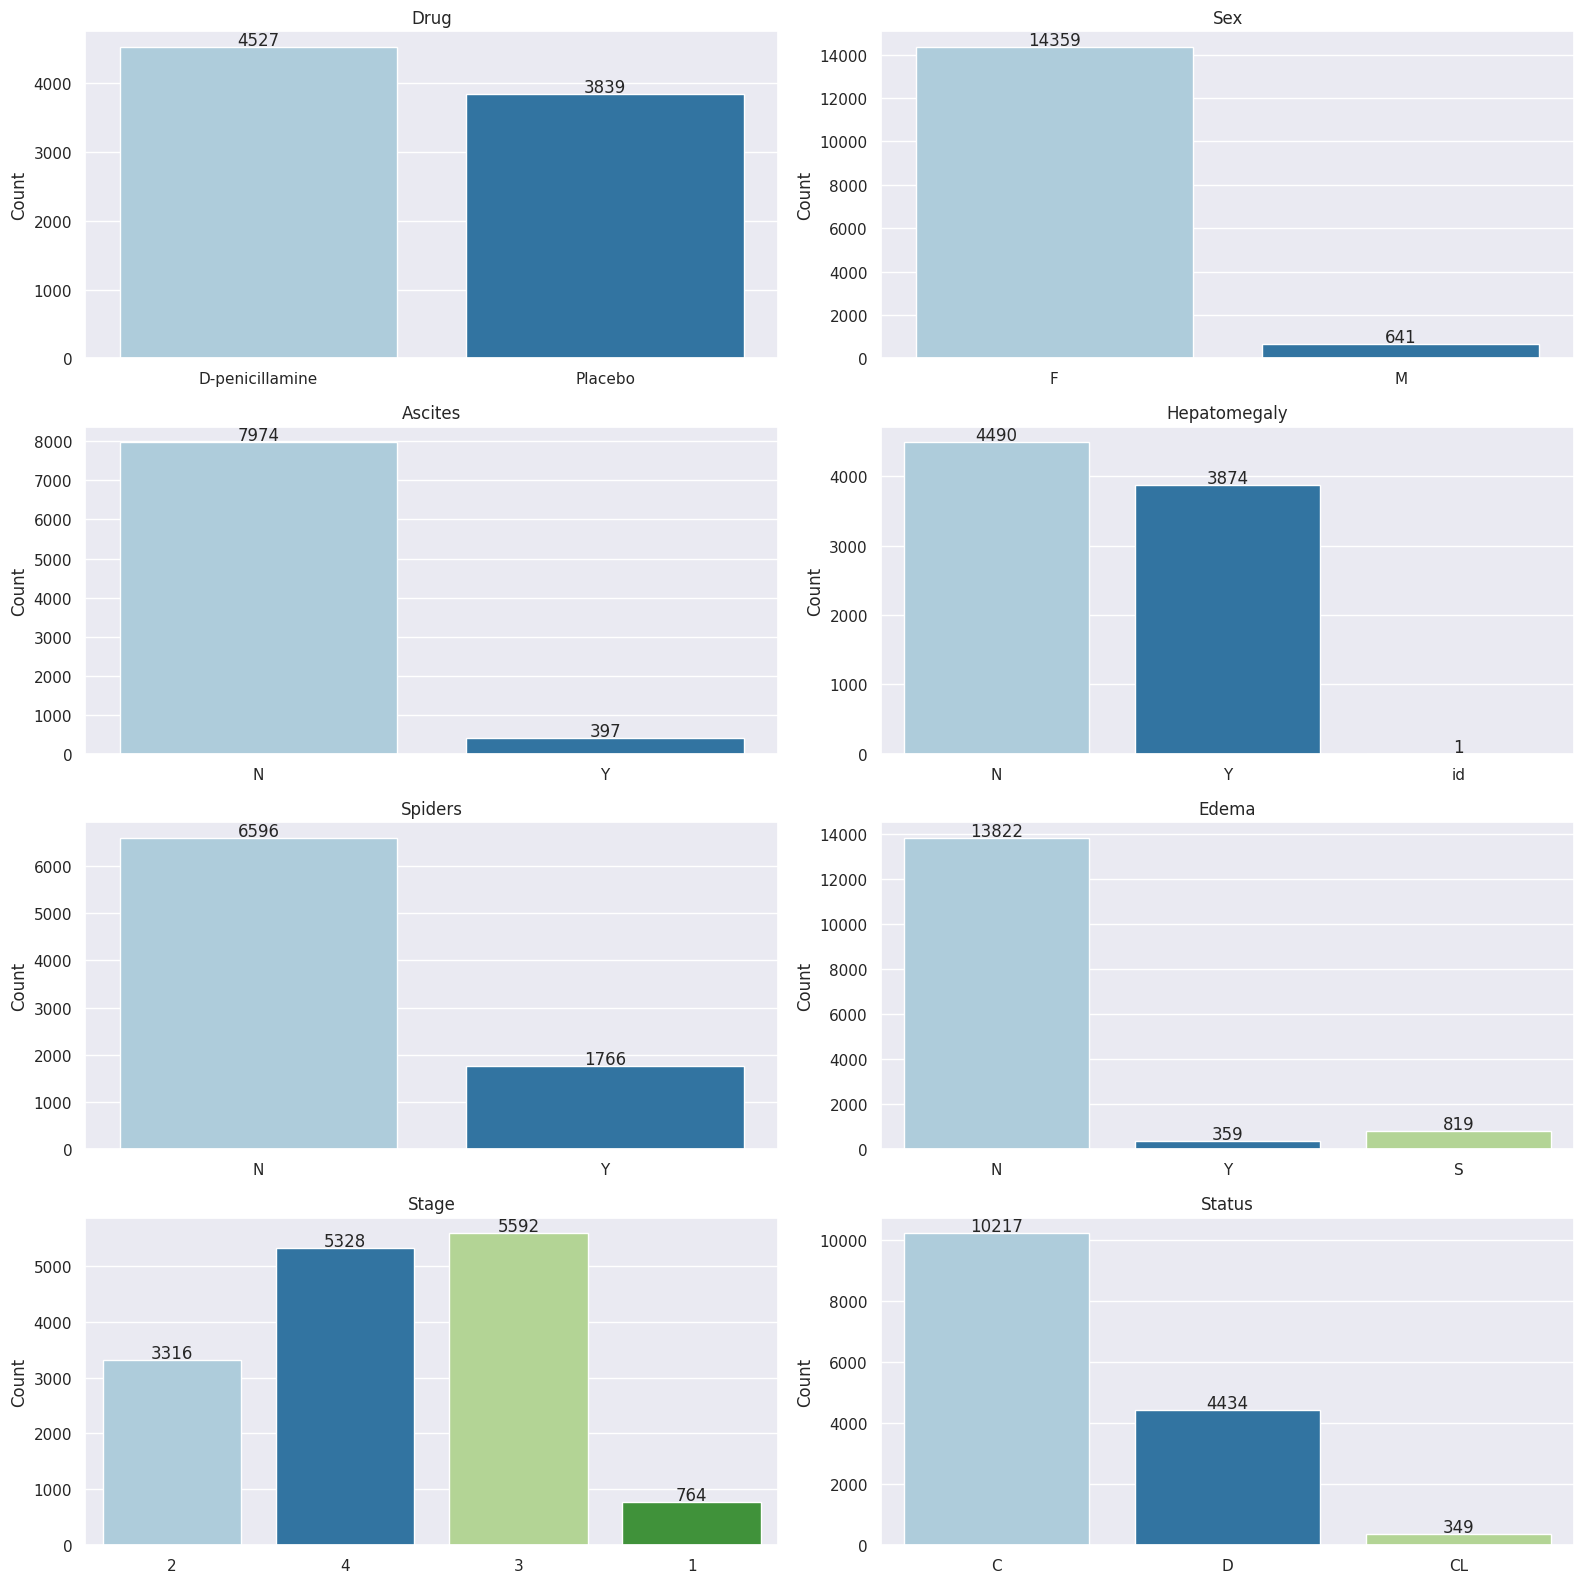

In [37]:
plot_counts(train, cat_cols)

#### **Observations for `TRAIN` Dataset**:

- `Imbalanced Data:`
  - Several categorical features exhibit imbalances, such as Sex, Drug, Ascites, Hepatomegaly, Spiders, Edema, and Status.
  - Imbalanced data can bias the model towards the majority class, leading to poor performance on minority classes.
- `Data Quality`:
	- The `Hepatomegaly` column has an unexpected value (id), indicating a potential data entry error.
	- This needs to be addressed to ensure the integrity of the data.
- `Class Imbalance in Target Variable`:
	- The target variable Status is imbalanced, which might require techniques like SMOTE or class weighting to handle the imbalance during model training.

In [47]:
# Removing the Stage column from the categorical column list for test
cat_cols.remove('Status')

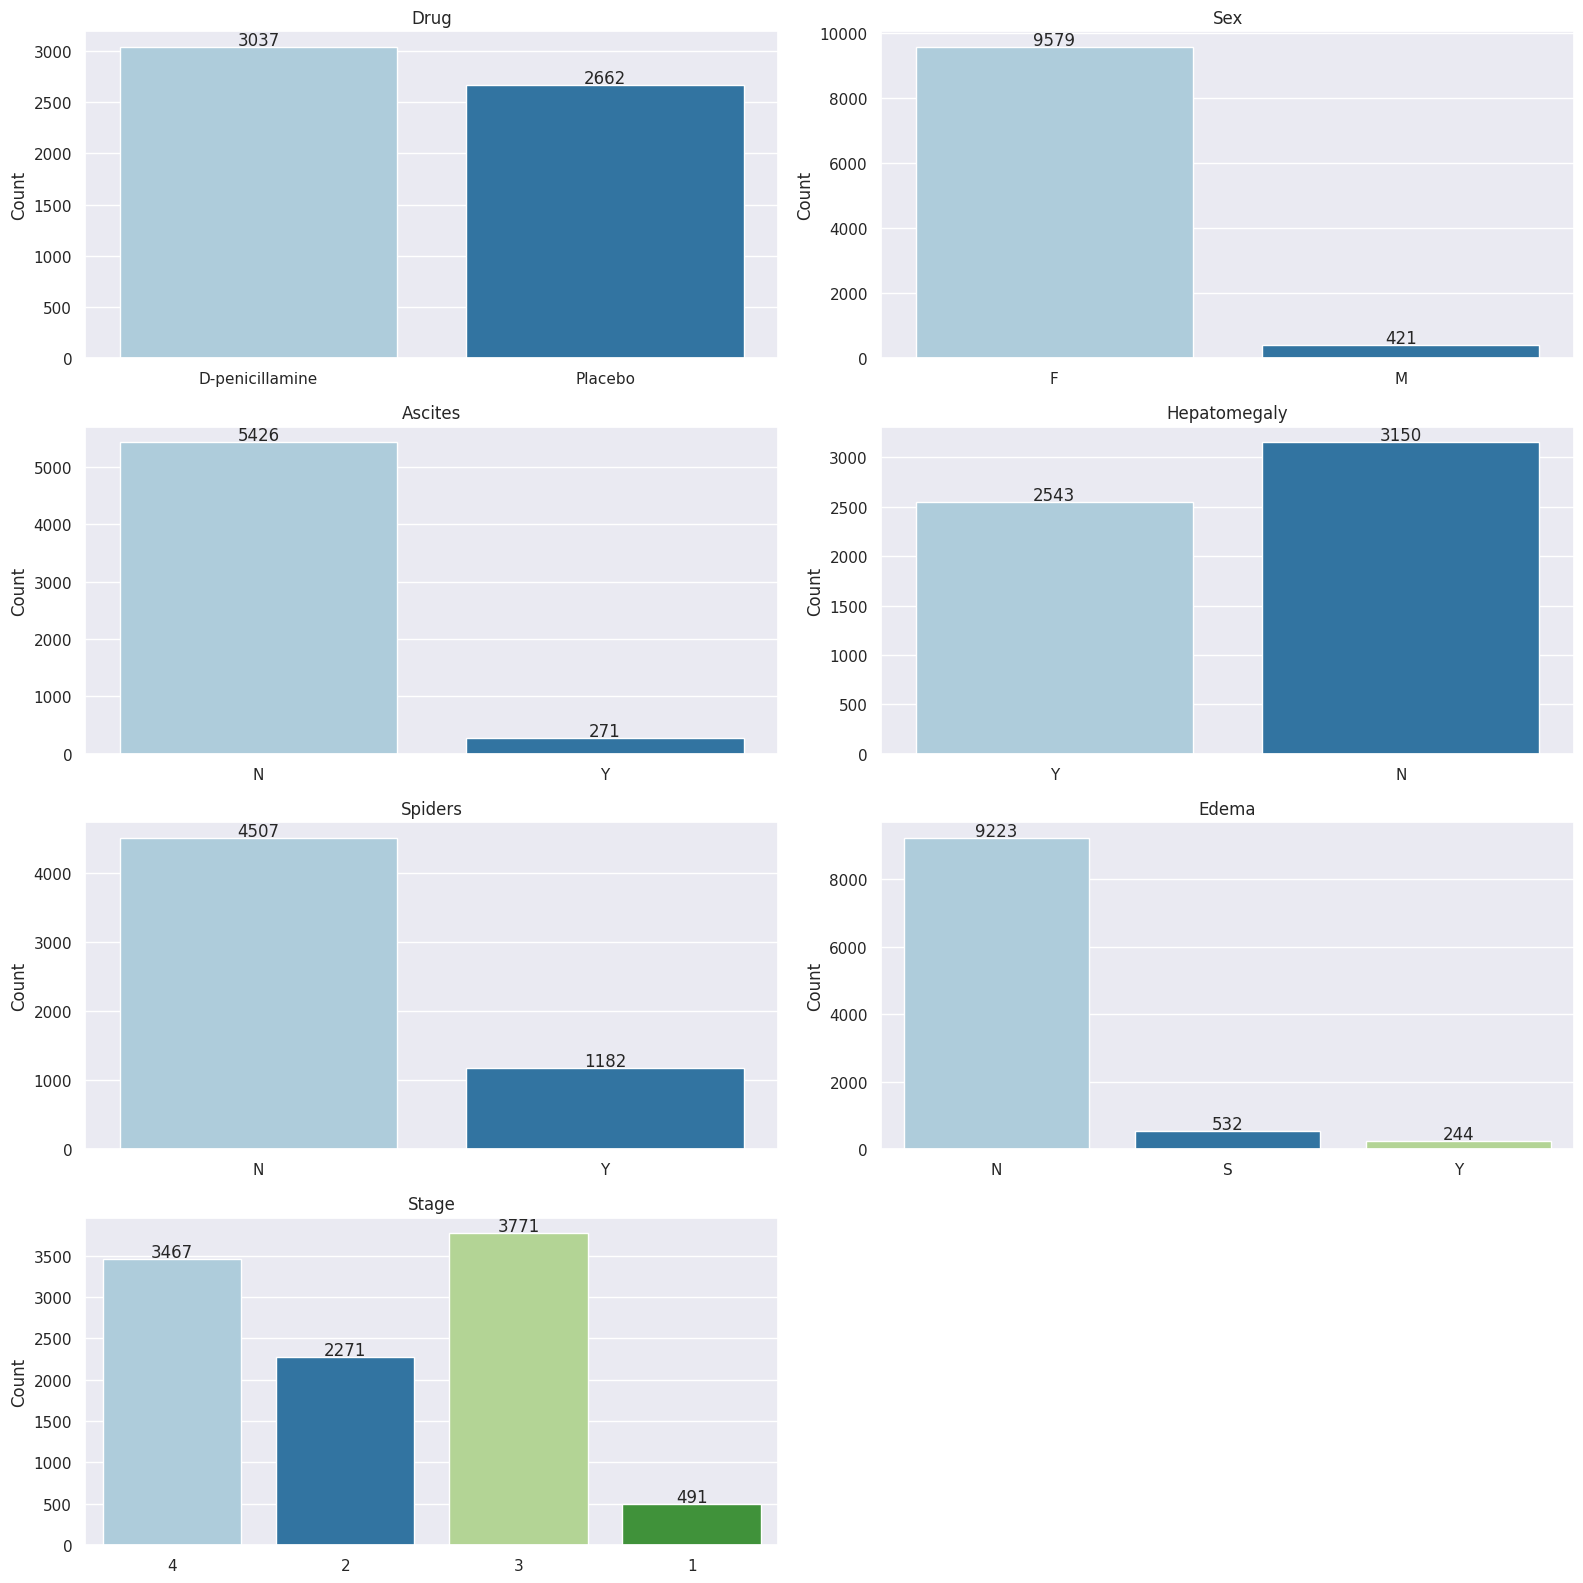

In [48]:
plot_counts(test, cat_cols)

**Observations**:
- `Imbalanced Data`:
	- Similar to the train data, several categorical features in the test data exhibit imbalances, such as Sex, Drug, Ascites, Hepatomegaly, Spiders, Edema, and Stage.
	- Imbalanced data can bias the model towards the majority class, leading to poor performance on minority classes.

## **Univairate Analysis**: Numerical Columns


In [55]:
import matplotlib.gridspec as gridspec
sns.set(style="darkgrid")
def dist_plot(data, feature_list):
    results = {}

    # number of columns of the subplots
    n_cols = 2
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(feature_list) / n_cols))

    # Create figure
    fig = plt.figure(figsize=(16, 4 * n_rows))
    outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

    for i in range(len(feature_list)):
        feature = feature_list[i]
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i],
                                                 wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))

        ax_box = plt.Subplot(fig, inner[0])
        sns.boxplot(data=data, x=feature, color='lightblue', ax=ax_box)
        ax_box.set_xlabel('')
        fig.add_subplot(ax_box)

        mean_value = data[feature].mean()
        median_value = data[feature].median()
        ax_hist = plt.Subplot(fig, inner[1])
        sns.histplot(data=data, x=feature, kde=True, ax=ax_hist)
        ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
        ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
        # Add a legend
        ax_hist.legend(loc='lower right', fontsize=10)

        # Calculate skewness and kurtosis
        skewness = data[feature].skew()
        kurt = data[feature].kurt()
        if skewness < 0:
            x = 0.25
        else:
            x = 0.95
        # Add skewness and kurtosis as text on the histogram plot
        ax_hist.text(x, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}",
                     transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
                     fontsize=10)
        fig.add_subplot(ax_hist)

        # Store results
        results[feature] = {
            'mean': mean_value,
            'median': median_value,
            'skewness': skewness,
            'kurtosis': kurt
        }

    plt.tight_layout()
    plt.show(block=False)

    return None

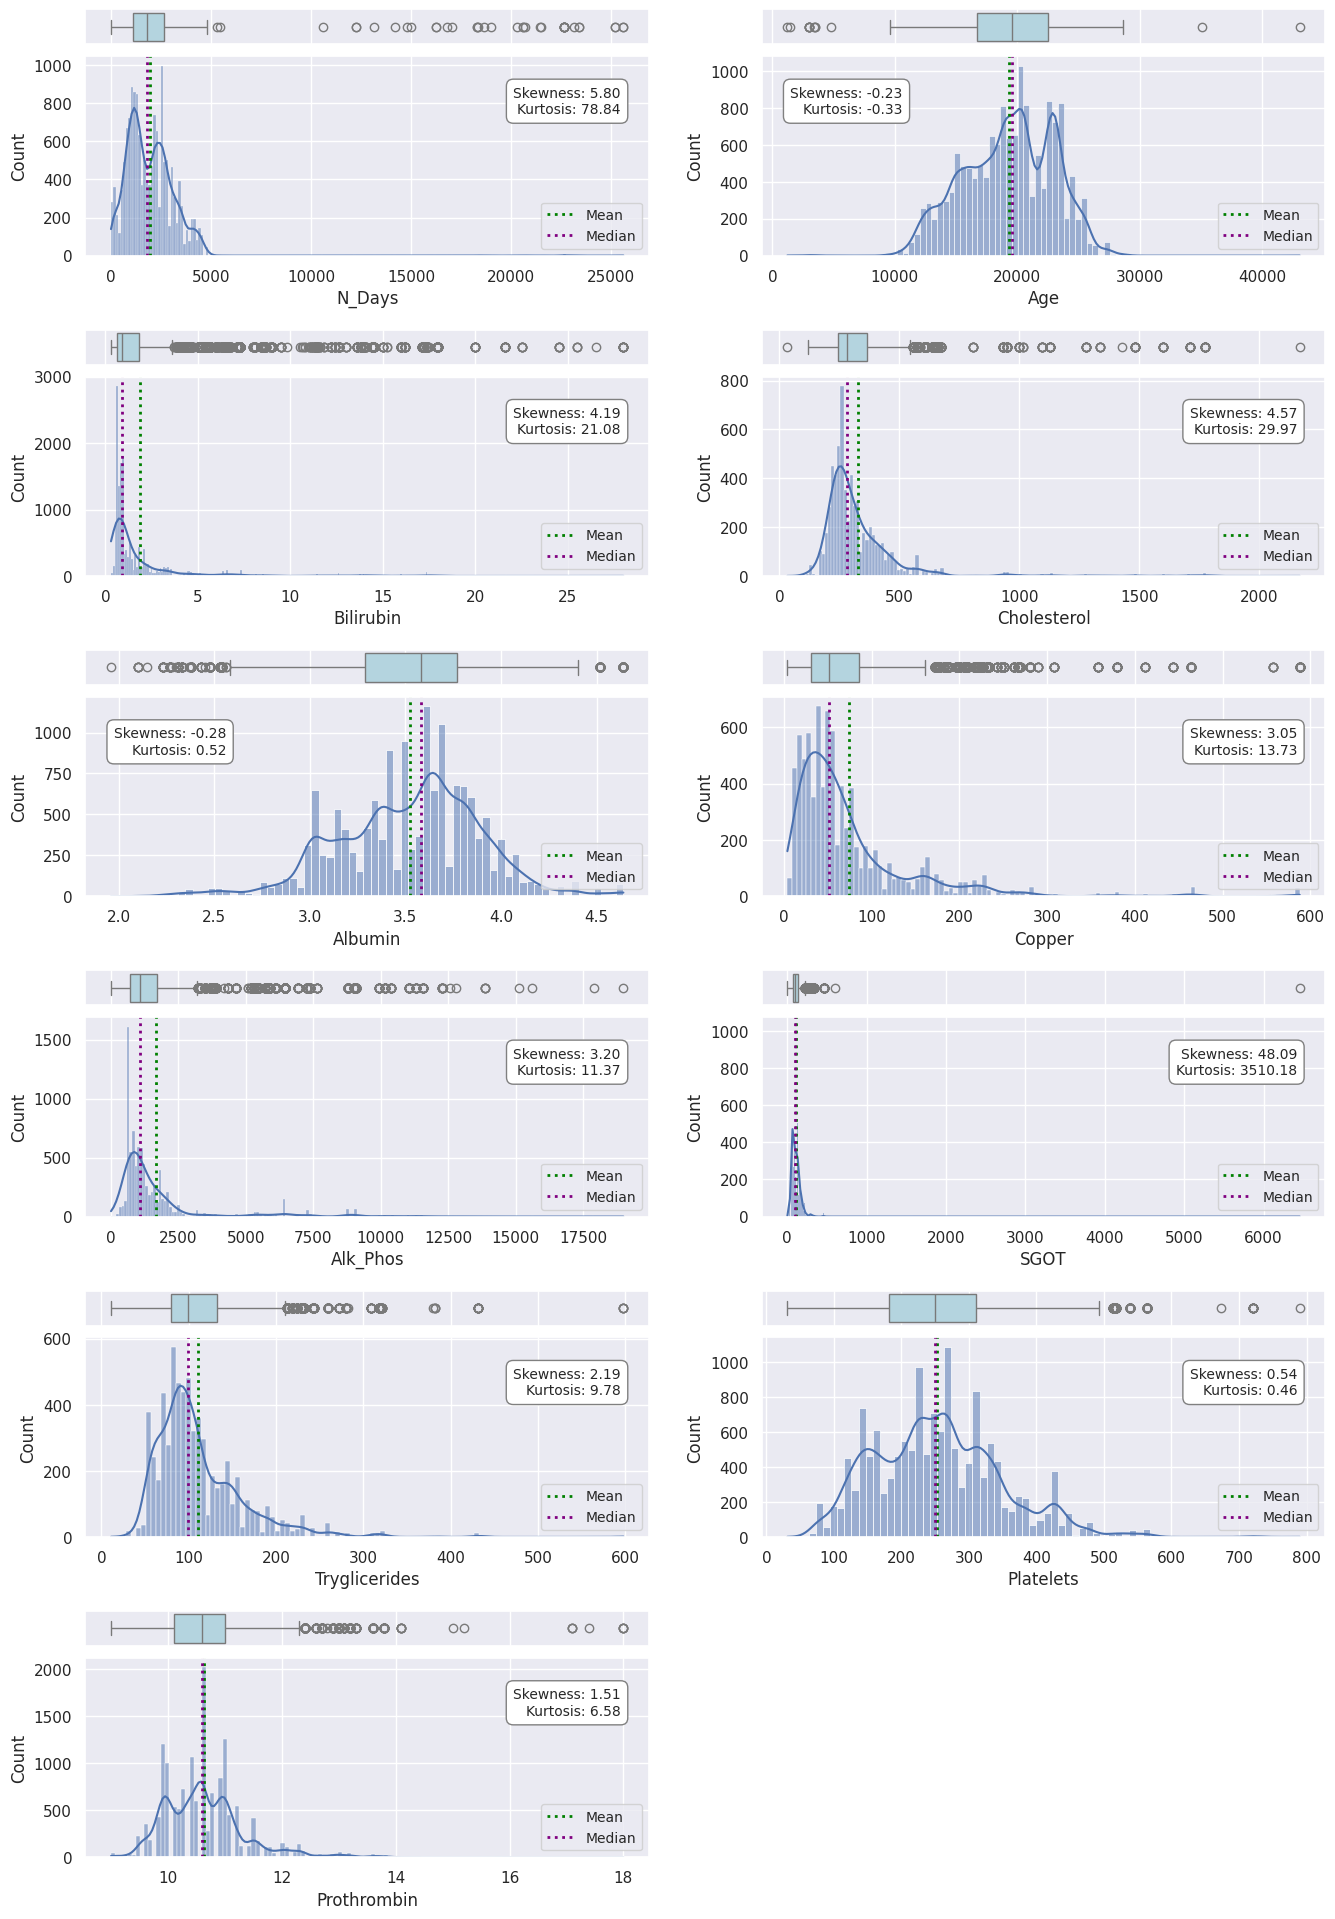

In [56]:
dist_plot(train, num_cols)


- **Skewness:**
    - `Near Zero`: Generally, low skewness values are preferred as they indicate a more symmetric distribution. This is especially important for models that assume normality.
	- `High Skewness`: Might require transformation to reduce skewness for better model performance.
- **Kurtosis:**
	- `Near Three (Mesokurtic)`: Indicates a distribution similar to the normal distribution, which is often preferred.
	- `High Kurtosis`: Indicates potential outliers. Depending on the context, you might want to address outliers to improve model robustness.
	- `Low Kurtosis`: May indicate that the distribution is too flat, which could suggest a lack of variability in the data.

**For `Test` Dataset**

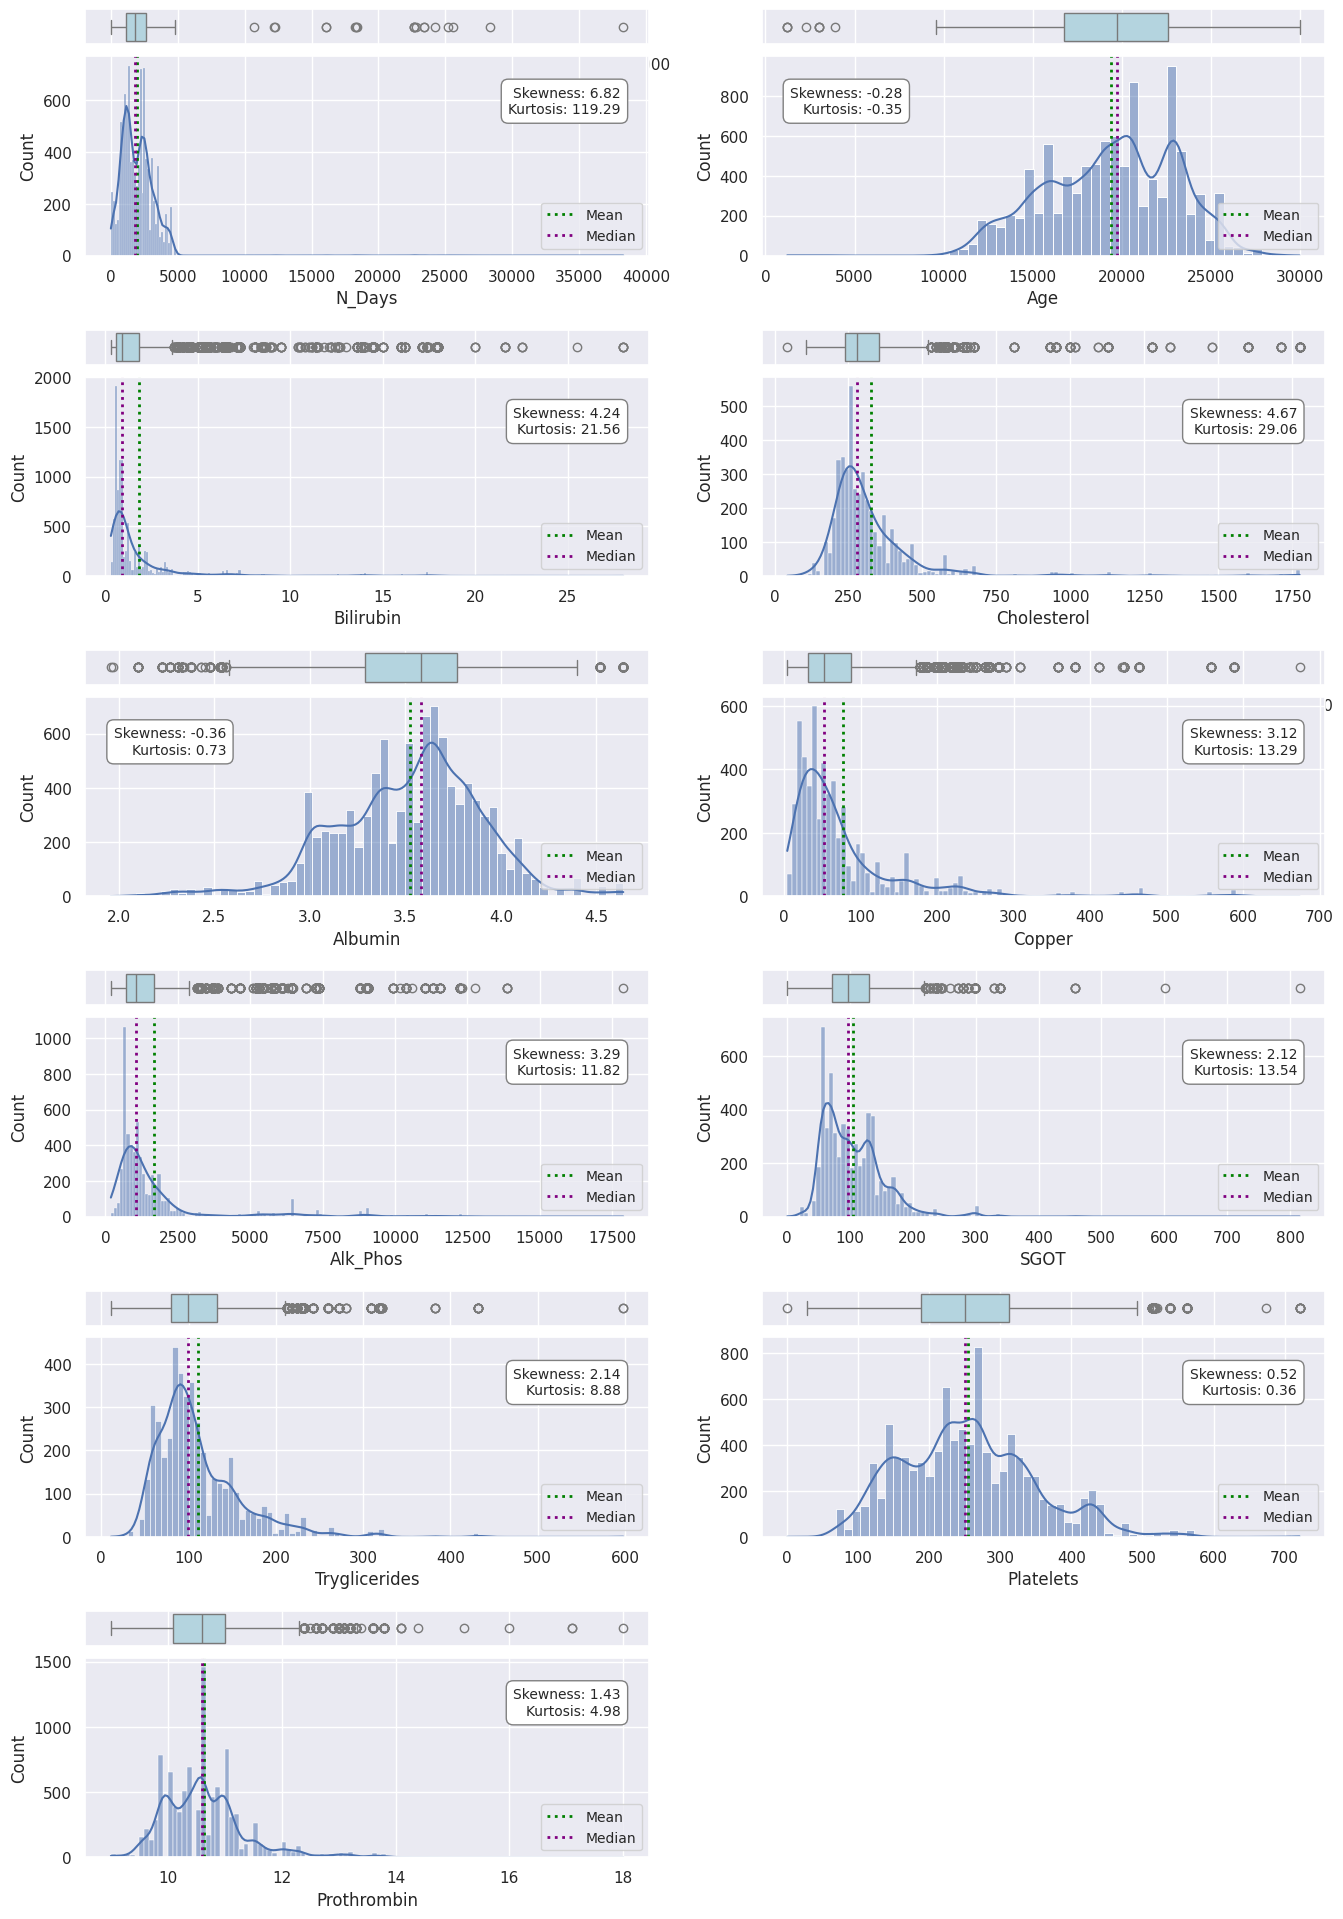

In [57]:
dist_plot(test, num_cols)


**Observations:**

- **High Skewness and Kurtosis**:
	- Many columns such as N_Days, Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides exhibit high skewness and kurtosis in both train and test datasets.
	- This indicates the presence of extreme outliers and long tails, which can affect model performance.
- **Consistency**:
	- The mean, median, skewness, and kurtosis values for most columns are relatively consistent between train and test datasets.
	- This suggests similar distributions, which is beneficial for model generalization.
- **Outliers**:
	- Columns like N_Days, SGOT, Cholesterol, Copper, and Alk_Phos have significantly high kurtosis, indicating a large number of outliers.
	- Outlier handling is crucial to improve model performance.
- **Symmetry**:
	- Columns like Age and Albumin exhibit slight skewness and kurtosis close to zero, indicating relatively symmetric distributions.
- **Distribution Shape**:
	- Features like Platelets and Prothrombin show near-normal distributions in terms of kurtosis but have moderate skewness.
	- These features may require transformations to reduce skewness for better model performance.

We'll handle the outliers as follows:
- Age <= 27500
- Bilirubin <= 10
- Cholesterol <= 600
- 2.5 <= Albumin <= 4.5
- Copper <= 200
- Alk_Phos <= 4000
- SGOT <= 200
- Tryglicerides <= 200
- Platelets <= 500
- Prothrombin <= 13

## **Bi-variate Analysis**


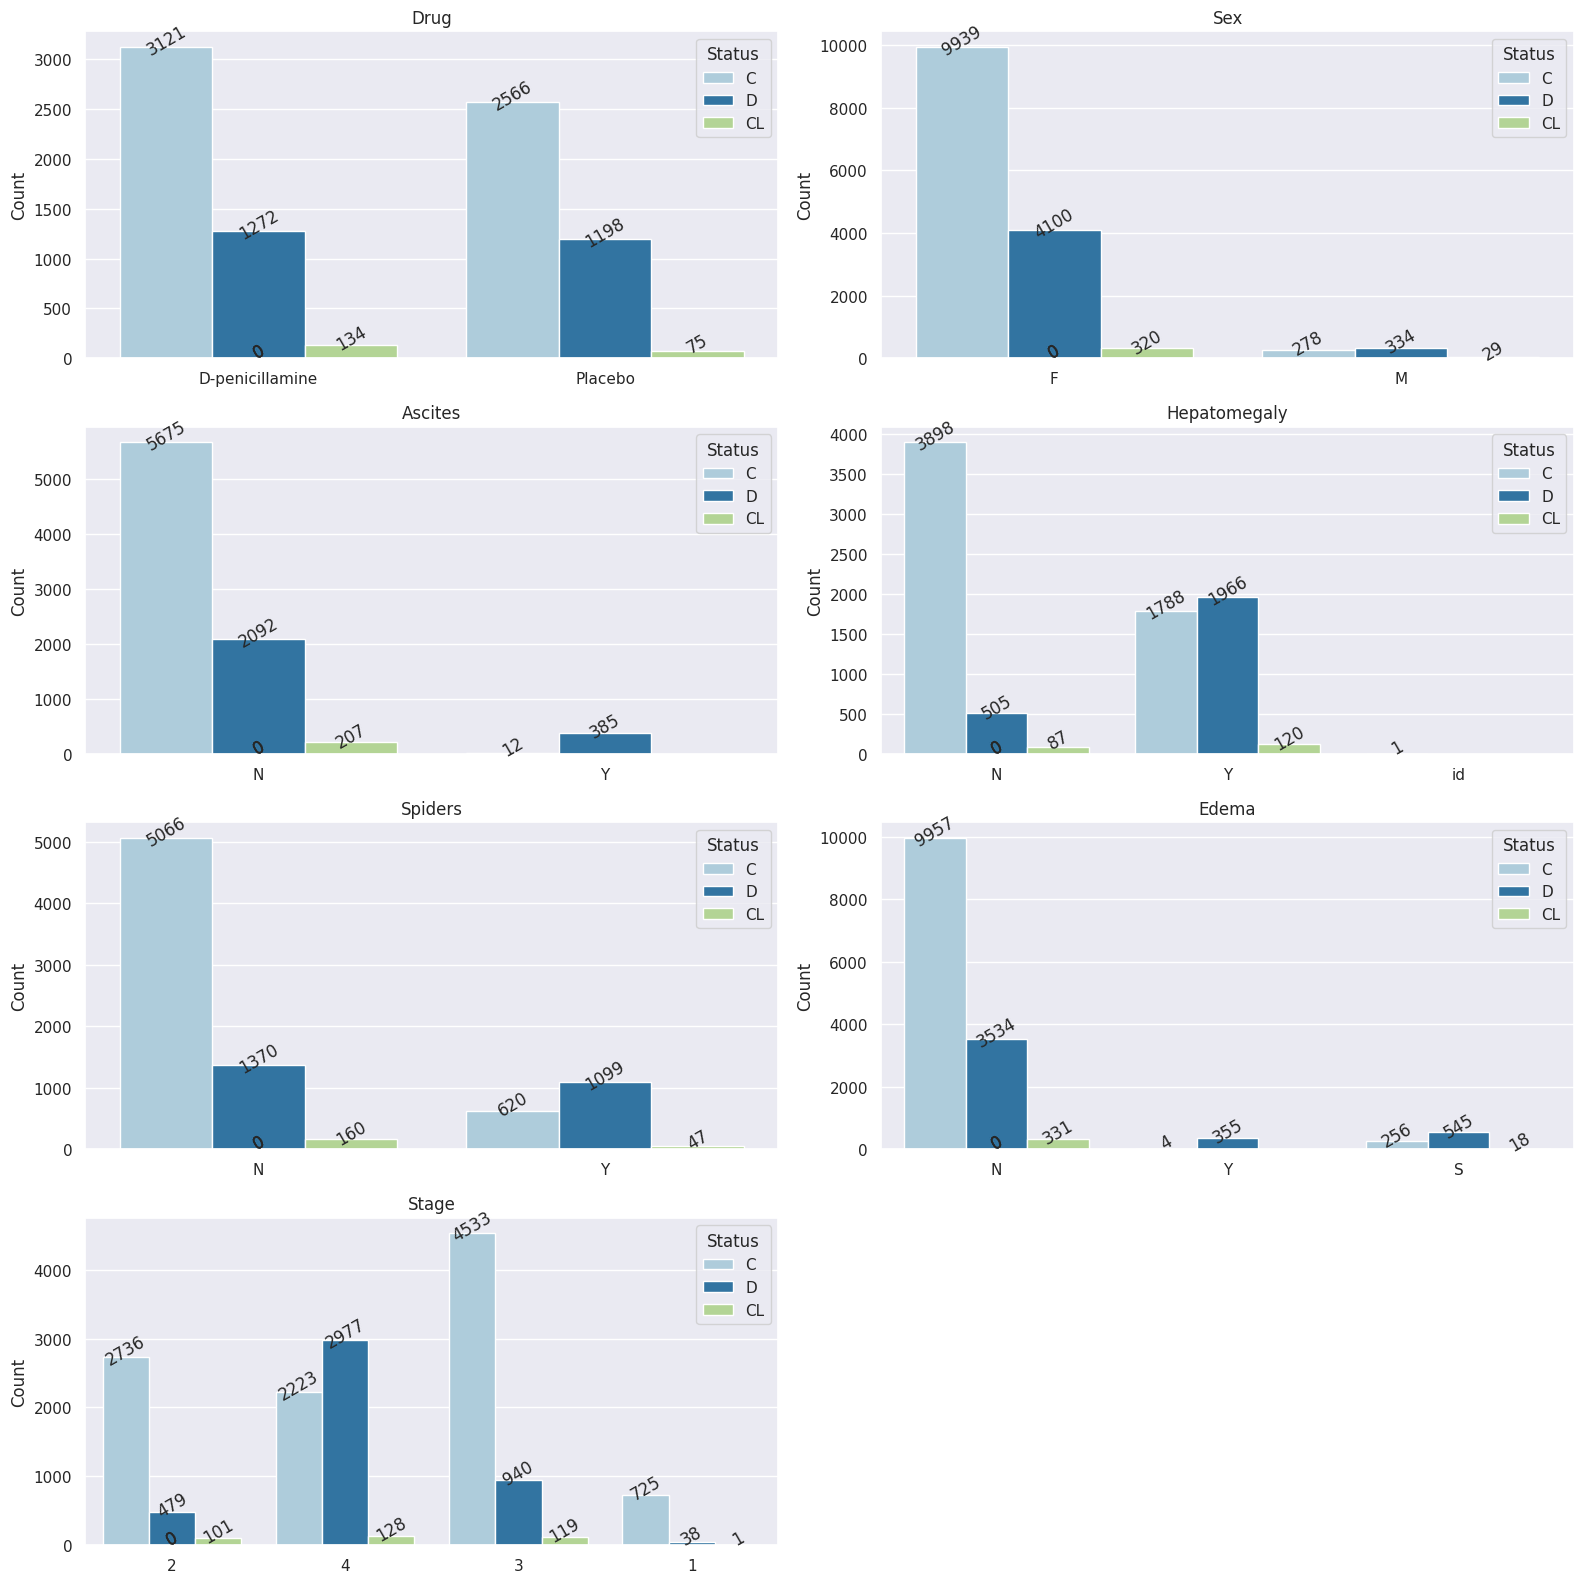

In [61]:
plot_counts(train, cat_cols, hue='Status')


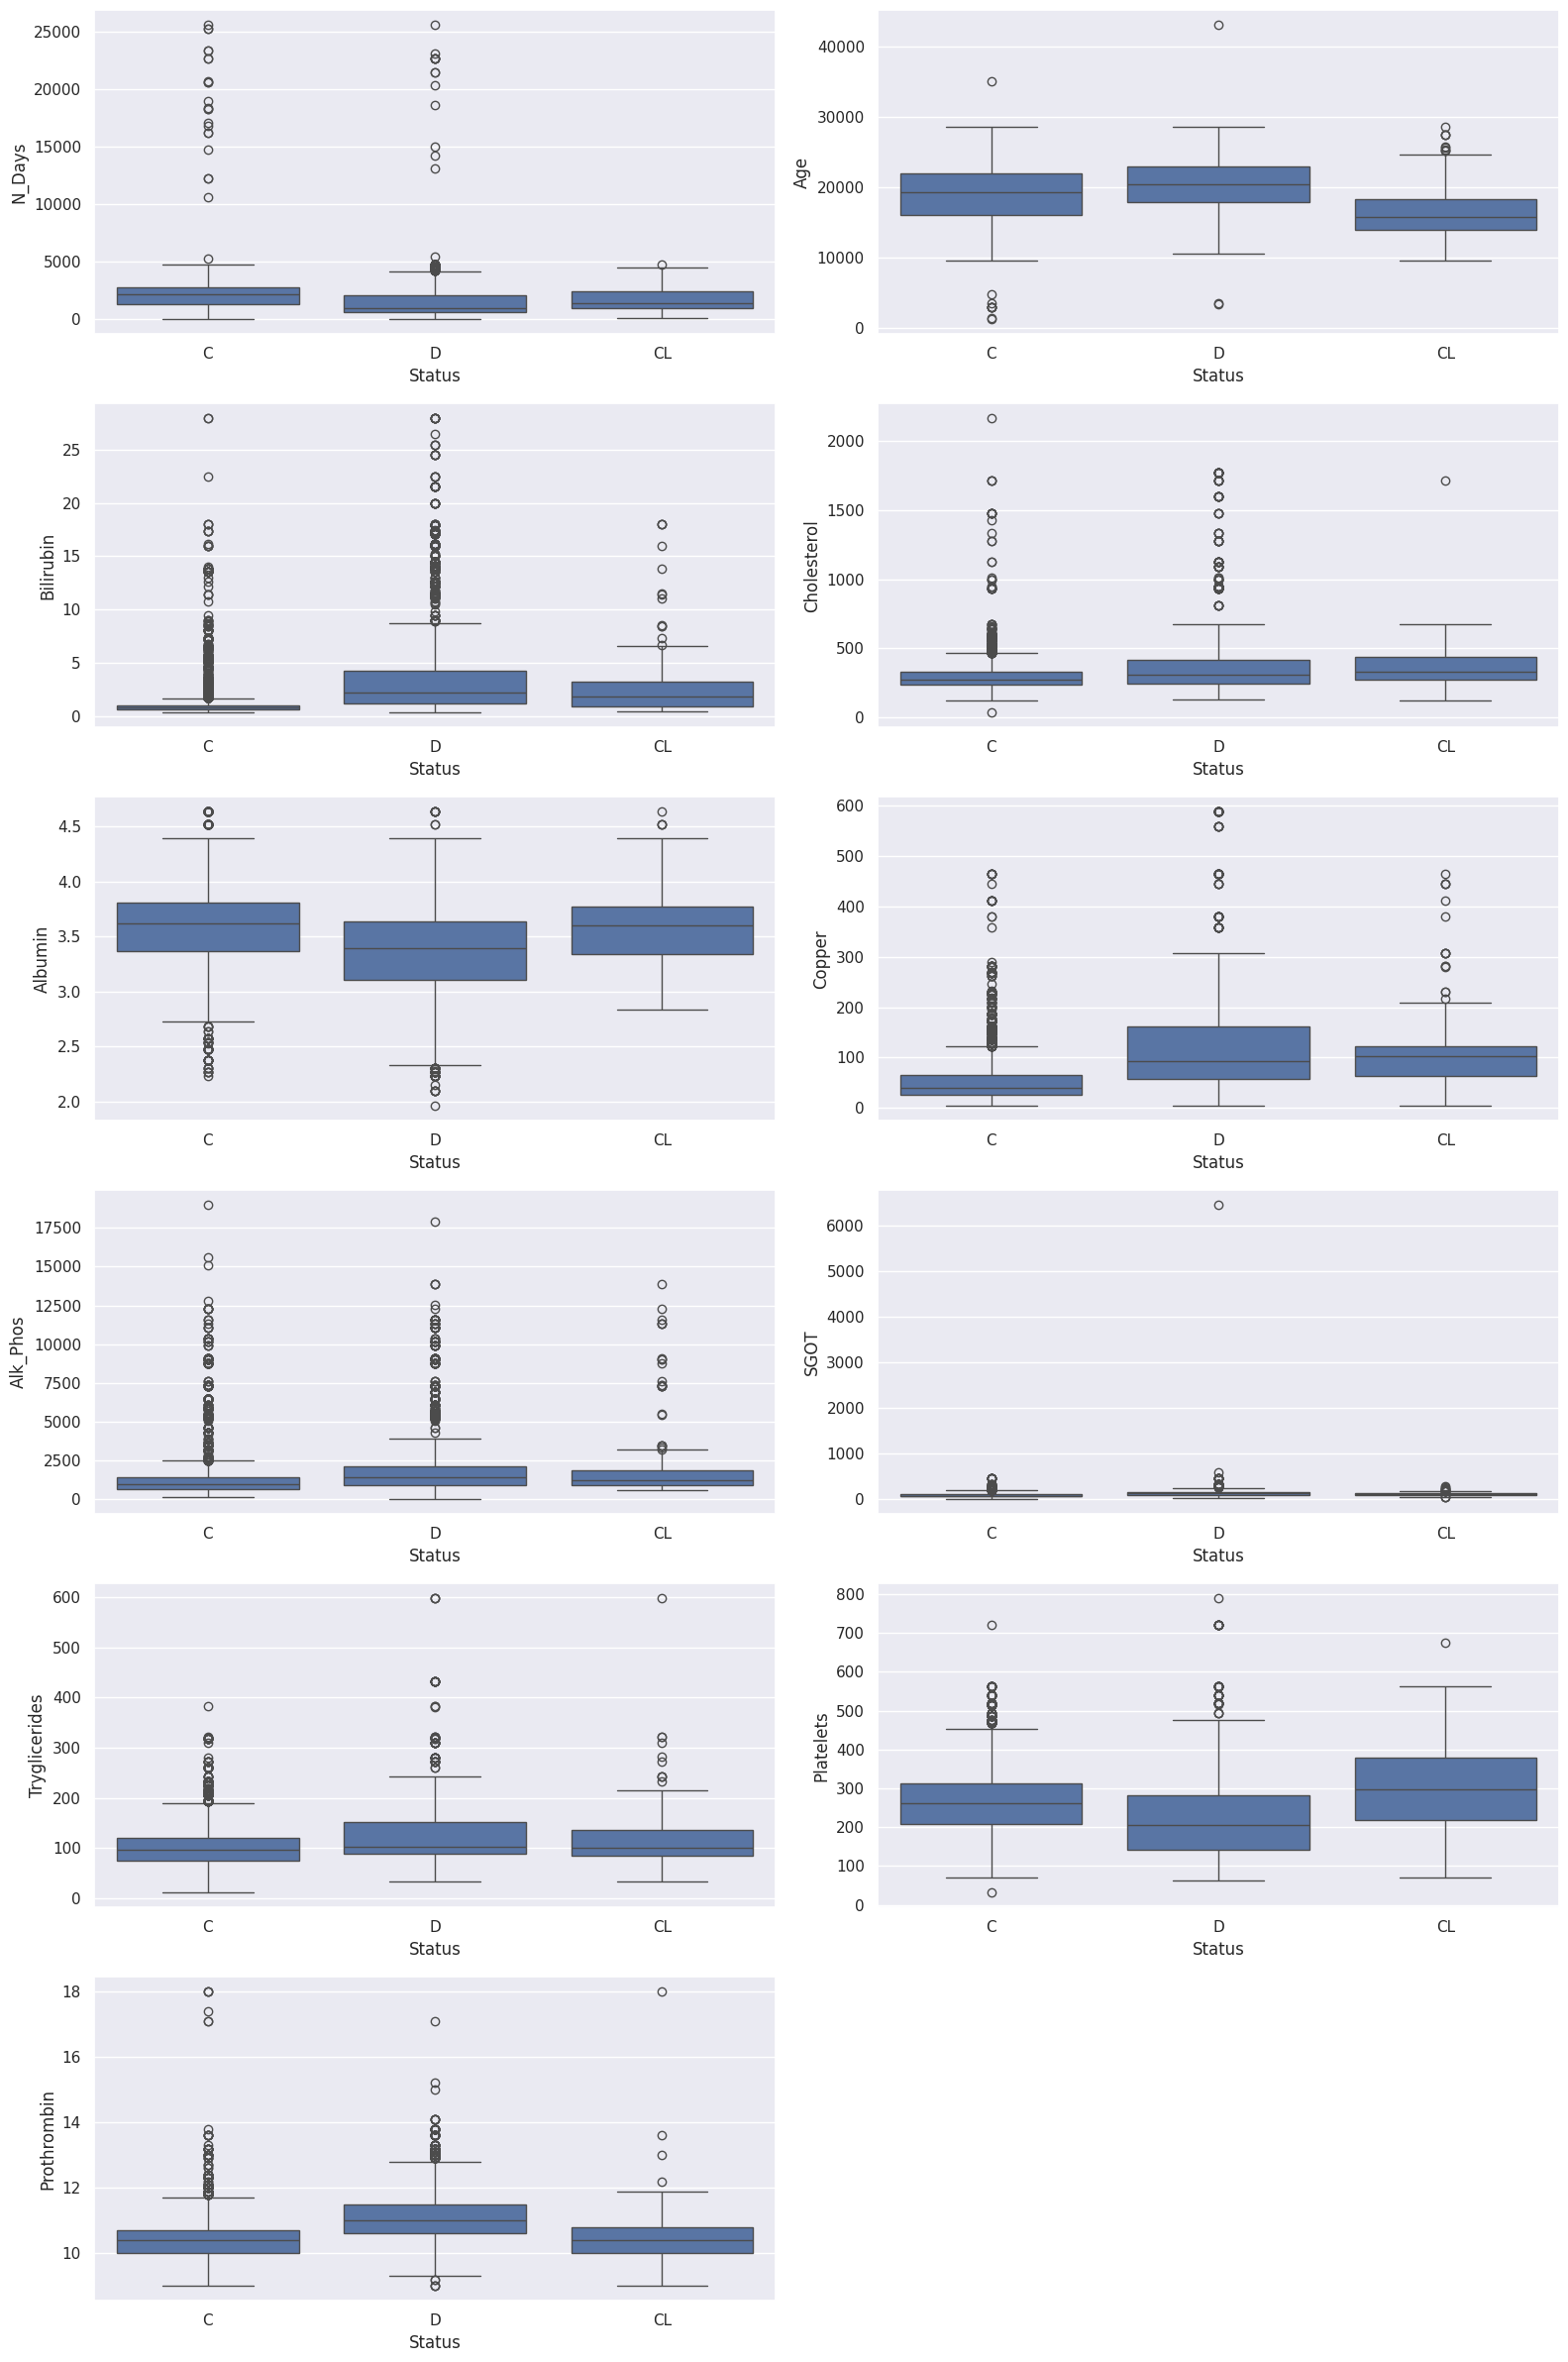

In [62]:
df = train

n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()

for i, feature in enumerate(num_cols):
    sns.boxplot(data=df, x='Status', y=feature, ax=ax[i])

if len(num_cols) % 2 != 0:
    fig.delaxes(ax[-1])

plt.tight_layout()
plt.show(block=False)
fig.savefig('boxplot_features.png')

**Observations:**

- **Presence of Outliers**: All numerical features exhibit a significant number of outliers across the different target categories. This indicates potential issues with extreme values that might affect model performance.
- **Variability Across Categories**: There is noticeable variability in almost all numerical features across different categories of the target variable (Status). This variability needs to be addressed to ensure robust modeling.
- **Median and Spread Differences**: Some features, such as Age, Bilirubin, Cholesterol, and Alk_Phos, show differences in median values and spreads across categories. This could indicate that these features are important for distinguishing between different classes of the target variable.

## **Multi-variate Analysis**


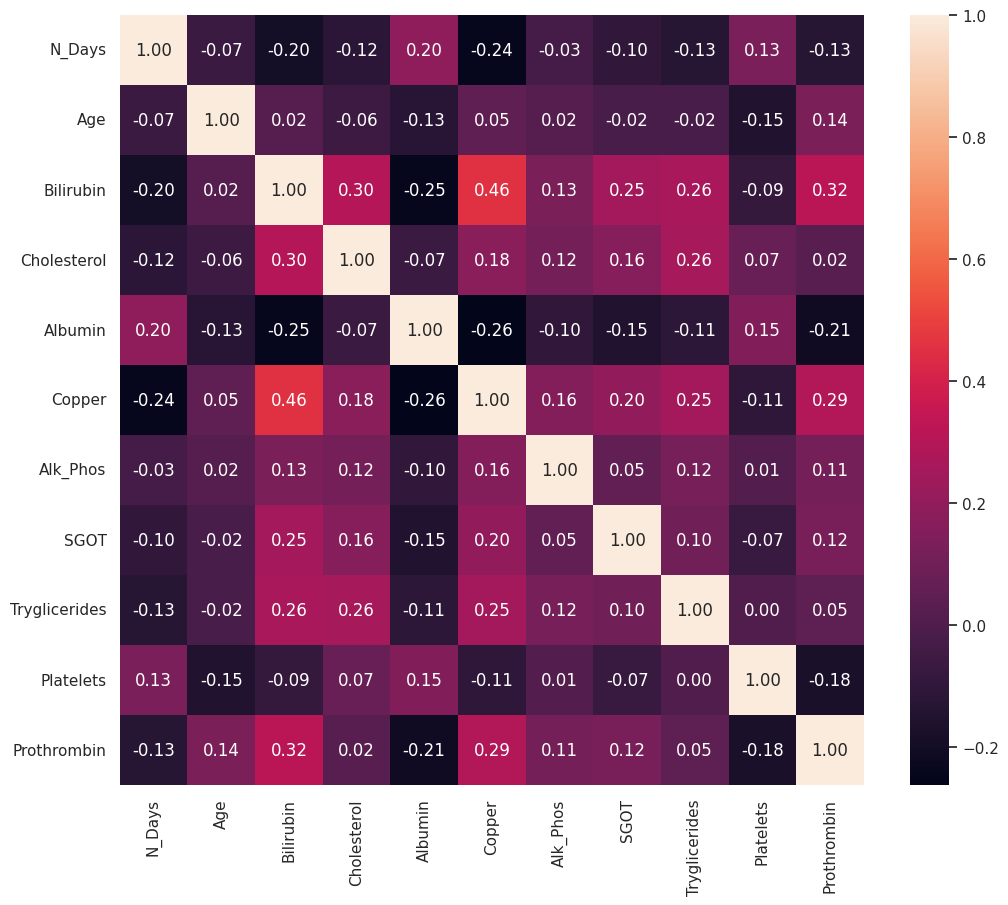

In [66]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

**Observations:**

- **Weak Correlations**: Most features have weak correlations with each other, indicating that there might be limited linear relationships among the features. This could suggest the need for more complex models to capture the relationships.
- **Moderate Correlations**: Only a few features, such as Bilirubin and Copper, show moderate correlations. These features might be more informative for the model.
- **Negative Correlations**: Several features have weak negative correlations with N_Days and Age, which might indicate some non-linear relationships.

## **Data Transformation**

In [55]:
### Remove N_Days column from both train and test
train = train.drop('N_Days', axis=1)
test = test.drop('N_Days', axis=1)

In [56]:
### Replace id value in Hepatomegaly column with less frequent value of this column
train['Hepatomegaly'] = train['Hepatomegaly'].replace('id', 'N')
test['Hepatomegaly'] = test['Hepatomegaly'].replace('id', 'N')

### **Handling Missing Values**

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

num_cols = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
            'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 1. Impute Missing Values Using Iterative Imputer
iter_imputer = IterativeImputer(max_iter=20, random_state=0)
train_iter_imputed = train.copy()
test_iter_imputed = test.copy()
train_iter_imputed[num_cols] = iter_imputer.fit_transform(train[num_cols])
test_iter_imputed[num_cols] = iter_imputer.transform(test[num_cols])

# 2. Impute Missing Values Using KNN Imputer
knn_imputer = KNNImputer(n_neighbors=20)
train_knn_imputed = train.copy()
test_knn_imputed = test.copy()
train_knn_imputed[num_cols] = knn_imputer.fit_transform(train[num_cols])
test_knn_imputed[num_cols] = knn_imputer.transform(test[num_cols])

In [79]:
print("Iterative Imputer - Train DataFrame")
train_iter_imputed[num_cols].describe()

Iterative Imputer - Train DataFrame


,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19306.519000,1.883317,318.128790,3.522011,74.938832,1682.233374,107.459286,109.526776,253.244394,10.630215
std,3655.099955,2.821023,117.755810,0.372347,56.840757,1420.085256,65.490519,34.081117,91.684202,0.725400
min,1223.000000,0.300000,33.000000,1.960000,4.000000,3.150000,0.900000,11.000000,31.000000,9.000000
25%,16688.000000,0.600000,273.000000,3.290000,48.000000,1009.000000,88.350000,99.440628,190.000000,10.100000
50%,19567.000000,0.900000,299.826578,3.580000,64.775659,1586.863645,102.299790,105.444857,249.000000,10.600000
75%,22514.000000,1.800000,326.975944,3.770000,81.000000,1702.405187,119.350000,111.999031,311.000000,11.000000
max,43095.000000,28.000000,2168.000000,4.640000,588.000000,18993.400000,6456.200000,598.000000,790.000000,18.000000


In [80]:
print("\nKNN Imputer - Train DataFrame")
train_knn_imputed[num_cols].describe()


KNN Imputer - Train DataFrame


,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19306.519000,1.883317,319.698570,3.522011,72.853930,1657.207370,106.368671,111.268433,252.861253,10.629777
std,3655.099955,2.821023,116.583216,0.372347,56.545375,1442.859627,65.586212,34.772700,91.913888,0.725136
min,1223.000000,0.300000,33.000000,1.960000,4.000000,3.150000,0.900000,11.000000,31.000000,9.000000
25%,16688.000000,0.600000,269.400000,3.290000,40.300000,955.000000,79.124500,94.687500,187.737500,10.100000
50%,19567.000000,0.900000,302.000000,3.580000,59.800000,1389.900000,102.300000,107.700000,248.000000,10.600000
75%,22514.000000,1.800000,342.650000,3.770000,87.650000,1811.410000,125.147500,121.512500,311.000000,11.000000
max,43095.000000,28.000000,2168.000000,4.640000,588.000000,18993.400000,6456.200000,598.000000,790.000000,18.000000


- `KNN Imputer`: Imputes missing values using the mean (or median) of the nearest k neighbors.
- `Iterative Imputer`: Imputes missing values by modeling each feature with missing values as a function of other features, iteratively.
- `Iterative Imputer` is generally considered better for more complex datasets as it can capture relationships between features more effectively, leading to more accurate imputations. However, it is computationally more intensive compared to KNN Imputer.

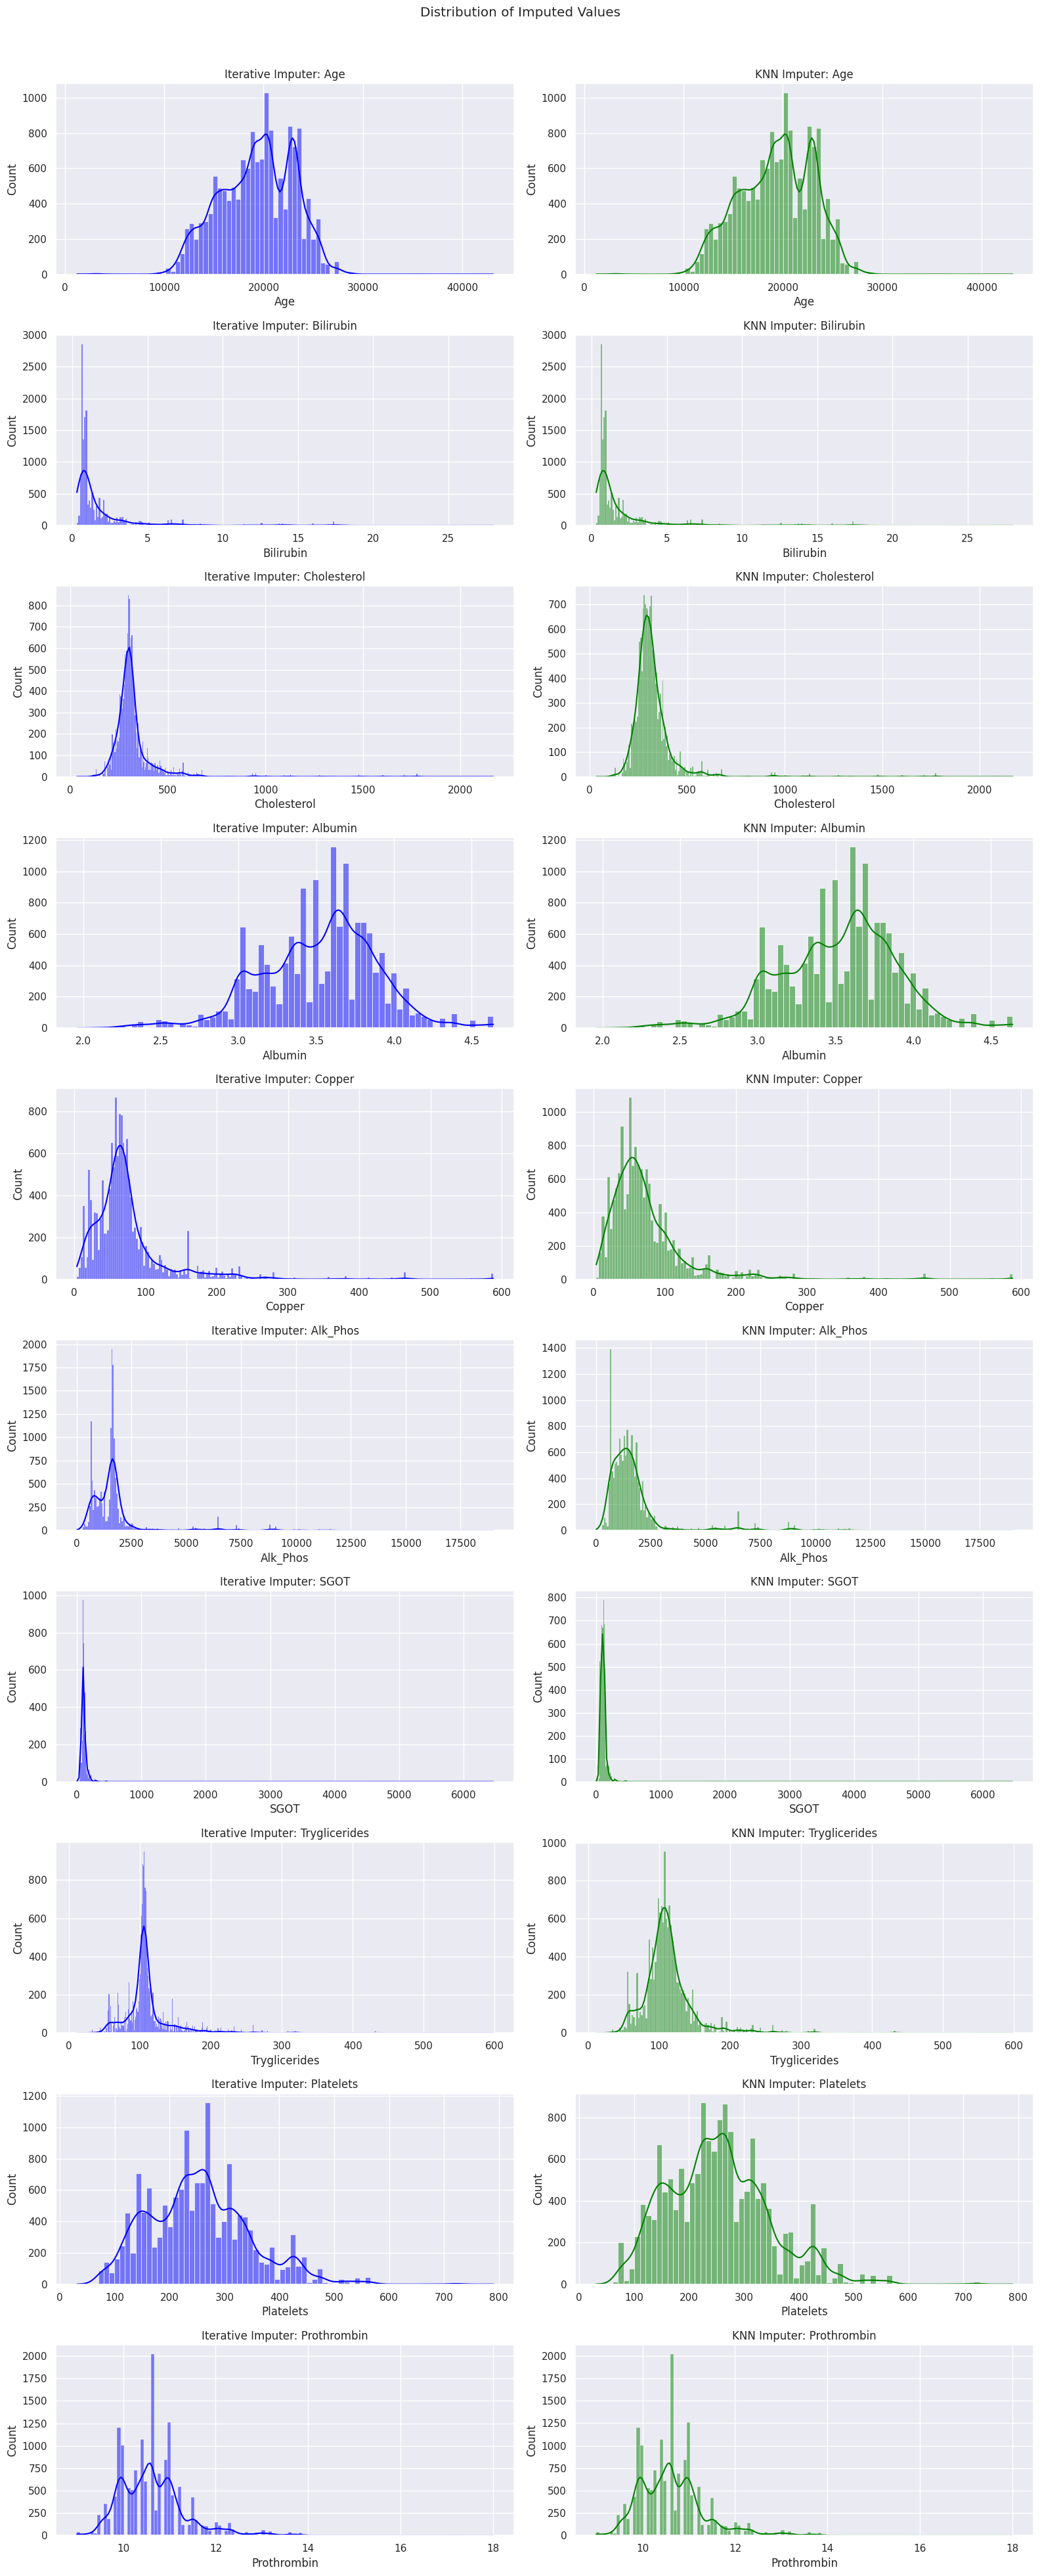

In [81]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(16, 4*len(num_cols)))
fig.suptitle('Distribution of Imputed Values')

for i, col in enumerate(num_cols):
    sns.histplot(train_iter_imputed[col], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Iterative Imputer: {col}')

    sns.histplot(train_knn_imputed[col], kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'KNN Imputer: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [58]:
train[num_cols] = train_iter_imputed[num_cols]
test[num_cols] = test_iter_imputed[num_cols]

In [59]:
train.shape, test.shape

((15000, 18), (10000, 17))

### **Handling Outliers**

In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

num_cols = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
            'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 1. Handle Outliers Using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers_iso = iso_forest.fit_predict(train[num_cols])
mask_iso = outliers_iso != -1

train_iso_imputed = train.copy()
train_iso_imputed = train_iso_imputed[mask_iso]

# 2. Handle Outliers Using Robust Z-Score Method
def robust_z_score(df, threshold=3):
    z_scores = np.abs((df - df.median()) / (1.4826 * (np.abs(df - df.median()).median())))
    return z_scores < threshold

mask_robust_z = robust_z_score(train[num_cols])
mask_robust_z = mask_robust_z.all(axis=1)

train_robust_z_imputed = train.copy()
train_robust_z_imputed = train_robust_z_imputed[mask_robust_z]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


- `Isolation Forest`: Detects outliers by isolating observations using a tree-based approach, focusing on anomalies that require fewer splits to isolate.
- `Robust Z-Score Method`: Detects outliers by calculating the Z-score using robust statistics (median and MAD), identifying values significantly deviating from the median.

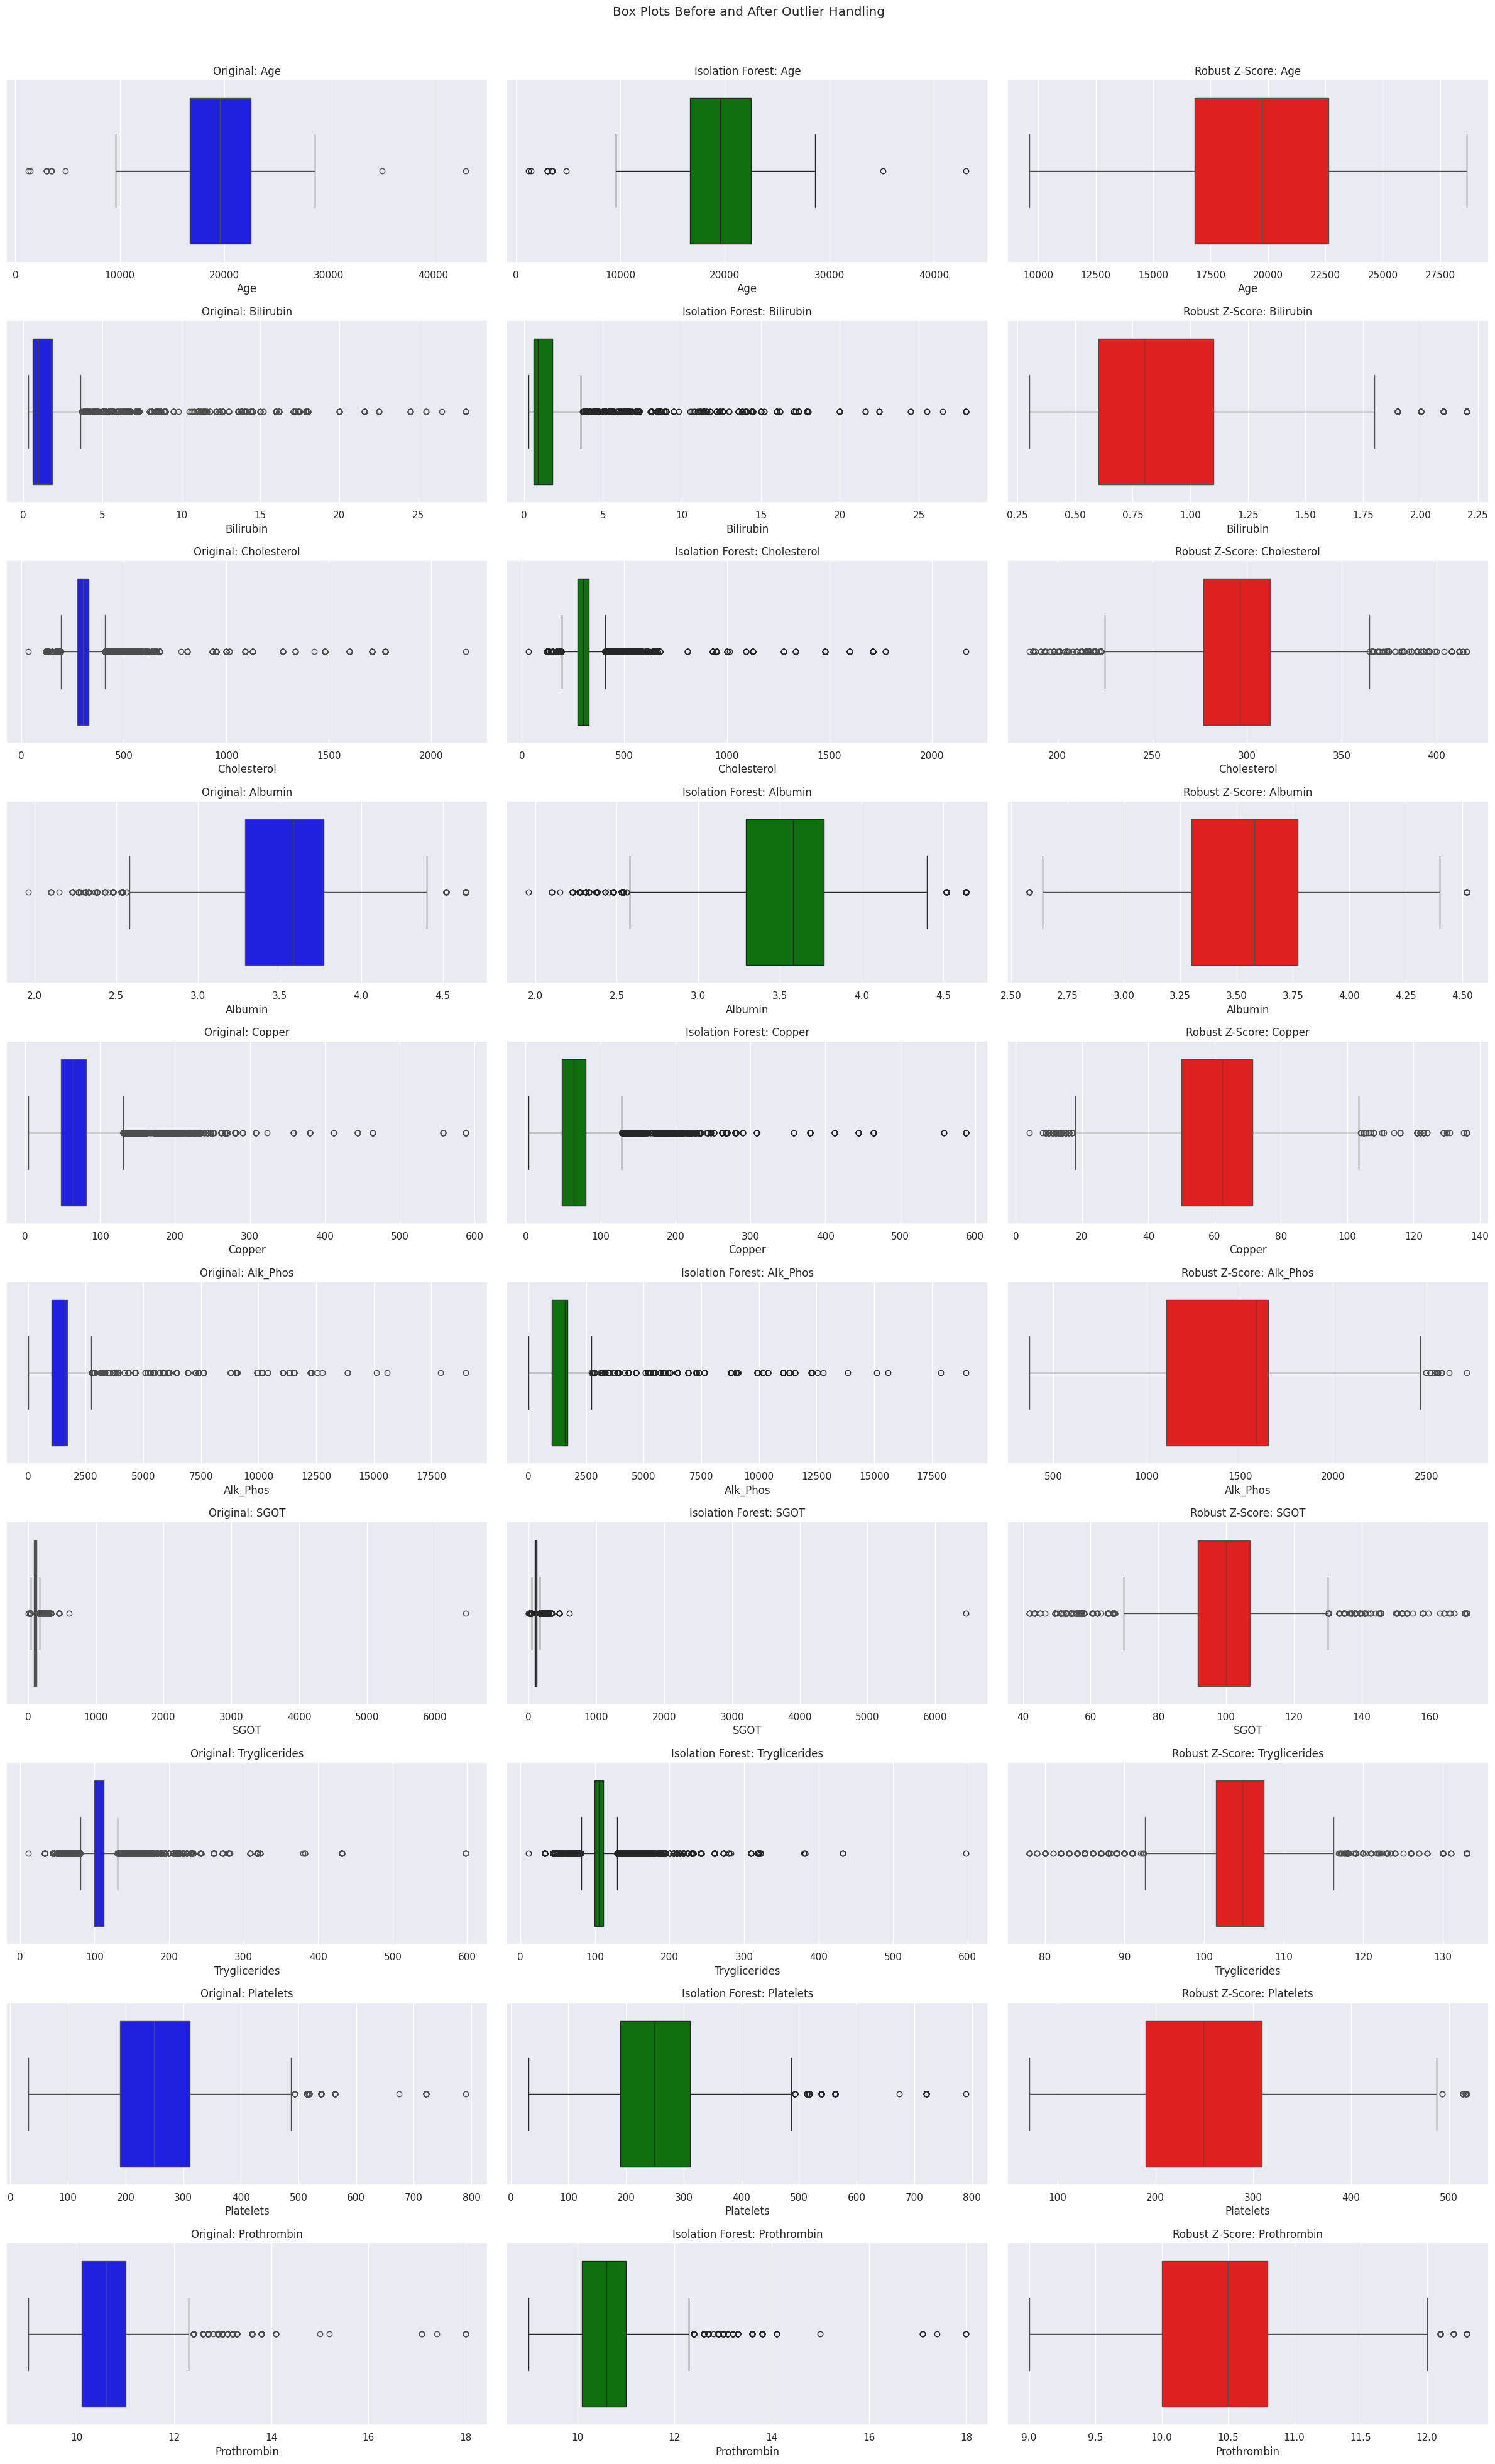

In [91]:
fig, ax = plt.subplots(len(num_cols), 3, figsize=(24, 4*len(num_cols)))
fig.suptitle('Box Plots Before and After Outlier Handling')

for i, col in enumerate(num_cols):
    sns.boxplot(data=train, x=col, ax=ax[i, 0], color='blue')
    ax[i, 0].set_title(f'Original: {col}')

    sns.boxplot(data=train_iso_imputed, x=col, ax=ax[i, 1], color='green')
    ax[i, 1].set_title(f'Isolation Forest: {col}')

    sns.boxplot(data=train_robust_z_imputed, x=col, ax=ax[i, 2], color='red')
    ax[i, 2].set_title(f'Robust Z-Score: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [47]:
mask_robust_z = robust_z_score(test[num_cols])
mask_robust_z = mask_robust_z.all(axis=1)

test_robust_z_imputed = test.copy()
test_robust_z_imputed = test_robust_z_imputed[mask_robust_z]

In [48]:
train = train_robust_z_imputed
test = test_robust_z_imputed

In [49]:
train.shape, test.shape

((8670, 18), (5783, 17))

### **Handling Missing Values of Categorical Columns**

- **Conditional Mode Imputation:** This method involves imputing missing values based on the distribution of the non-missing values within the same column, effectively preserving the original distribution of the data.

In [60]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from collections import Counter

cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
output_col = 'Status'

for col in cat_cols:
    prop = train[col].value_counts(normalize=True)
    fill_values = []
    for value, count in prop.items():
        fill_values.extend([value] * int(count * train[col].isnull().sum()))

    np.random.shuffle(fill_values)

    if len(fill_values) < train[col].isnull().sum():
        fill_values.extend([prop.idxmax()] * (train[col].isnull().sum() - len(fill_values)))
    elif len(fill_values) > train[col].isnull().sum():
        fill_values = fill_values[:train[col].isnull().sum()]

    train.loc[train[col].isnull(), col] = fill_values


# for test data
for col in cat_cols:
    prop = test[col].value_counts(normalize=True)
    fill_values = []
    for value, count in prop.items():
        fill_values.extend([value] * int(count * test[col].isnull().sum()))

    np.random.shuffle(fill_values)

    if len(fill_values) < test[col].isnull().sum():
        fill_values.extend([prop.idxmax()] * (test[col].isnull().sum() - len(fill_values)))
    elif len(fill_values) > test[col].isnull().sum():
        fill_values = fill_values[:test[col].isnull().sum()]

    test.loc[test[col].isnull(), col] = fill_values

In [14]:
print("Missing values after Conditional Mode Imputation:")
train[cat_cols].isnull().sum()

Missing values after Conditional Mode Imputation:


Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Stage           0
dtype: int64

## **Feature Engineering**

In [61]:
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

target = 'Status'
cat_cols_nominal = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
cat_cols_ordinal = ['Stage']
num_cols = ['Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [62]:
# Convert categorical columns to string type
for col in cat_cols_nominal + cat_cols_ordinal:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

#### **Feature Scaling and Encoding**

In [63]:
# Scale numerical columns using RobustScaler
scaler = RobustScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

# Encode nominal categorical columns using OneHotEncoder
nominal_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

train_nominal_encoded = nominal_encoder.fit_transform(train[cat_cols_nominal])
test_nominal_encoded = nominal_encoder.transform(test[cat_cols_nominal])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
# Encode ordinal categorical columns using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

train_ordinal_encoded = ordinal_encoder.fit_transform(train[cat_cols_ordinal])
test_ordinal_encoded = ordinal_encoder.transform(test[cat_cols_ordinal])

# Create DataFrame for encoded nominal features
train_nominal_df = pd.DataFrame(train_nominal_encoded, columns=nominal_encoder.get_feature_names_out(cat_cols_nominal))
test_nominal_df = pd.DataFrame(test_nominal_encoded, columns=nominal_encoder.get_feature_names_out(cat_cols_nominal))

# Create DataFrame for encoded ordinal features
train_ordinal_df = pd.DataFrame(train_ordinal_encoded, columns=cat_cols_ordinal)
test_ordinal_df = pd.DataFrame(test_ordinal_encoded, columns=cat_cols_ordinal)

In [65]:
train.shape, test.shape

((15000, 18), (10000, 17))

In [66]:
# Reset indices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
# Concatenate processed numerical and categorical features
train_processed = pd.concat([train[num_cols], train_nominal_df, train_ordinal_df], axis=1)
test_processed = pd.concat([test[num_cols], test_nominal_df, test_ordinal_df], axis=1)

# Encode target variable
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(train[target])

#### **Handling class Imbalance**

- **SMOTE (Synthetic Minority Over-sampling Technique):** When we have a dataset where one class (like ‘yes’ or ‘no’) has much fewer examples than the others, this is called class imbalance. It can make our model biased towards the majority class. SMOTE helps fix this by creating synthetic examples of the minority class.

In [67]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_processed, y_train)

In [68]:
X_resampled.shape, y_resampled.shape, train_processed.shape, test_processed.shape

((30651, 24), (30651,), (15000, 24), (10000, 24))

In [116]:
# Save the processed data to CSV files for future use
train_processed.to_csv('train_processed.csv', index=False)
test_processed.to_csv('test_processed.csv', index=False)
np.savetxt('y_resampled.csv', y_resampled, delimiter=',')

### **Train & Test Split**

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## **Model Training**


- **Why I Chose These Classifiers:**
	- AdaBoost, XGBoost, and RandomForest are powerful ensemble methods that often provide strong performance on a wide variety of tasks. They are capable of handling complex datasets with high dimensionality and interactions among features.
- **Why I Selected These Hyper-parameters:**
	- The hyper-parameters chosen for each classifier, such as n_estimators, learning_rate, max_depth, min_samples_split, and min_samples_leaf, are crucial for controlling the complexity of the model, preventing overfitting, and ensuring good generalization. These specific ranges are selected to explore a wide spectrum of model configurations, balancing the trade-off between bias and variance.
- **Benefits of These Classifiers:**
	- `AdaBoost`: Boosts the performance of weak learners (like decision stumps) by focusing on the errors of previous models. It is particularly effective in reducing bias and variance.
	- `XGBoost`: Known for its efficiency and speed, it provides state-of-the-art results in many machine learning competitions due to its regularization techniques which prevent overfitting.
	- `RandomForest`: Robust to overfitting and provides high accuracy by averaging multiple decision trees, thereby reducing the variance of predictions.
- **Overall One Good Point for Presentation:**
	- `Ensemble Learning Power`: This approach leverages the strengths of multiple machine learning algorithms through ensemble methods. By tuning and combining these diverse models, we significantly enhance predictive performance and robustness, ensuring the best model selection for our dataset. This makes our solution more adaptable and accurate, offering reliable insights and predictions.

In [23]:

import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier


# Define classifiers and their parameter grids
classifiers = {
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'RandomForest': RandomForestClassifier()
}

param_grids = {
    'AdaBoost': {
        'n_estimators': [50, 100, 200, 500, 300],
        'learning_rate': [0.01, 0.1, 1, 0.001, 0.0001]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [3, 6, 10, 15, 20],
        'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [3, 6, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 5, 6]
    }
}

# Store the best models and their performance
best_models = {}
best_logloss = float('inf')
best_model_name = None
results = {}

# Perform grid search with cross-validation for each classifier
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[clf_name], cv=5, scoring='neg_log_loss', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[clf_name] = grid_search.best_estimator_
    best_score = -grid_search.best_score_

    results[clf_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': best_score
    }

    if best_score < best_logloss:
        best_logloss = best_score
        best_model_name = clf_name

    print(f"Best Hyperparameters for {clf_name}: {grid_search.best_params_}")
    print(f"Best Log Loss for {clf_name}: {best_score}")

Training AdaBoost...
Best Hyperparameters for AdaBoost: {'learning_rate': 0.001, 'n_estimators': 100}
Best Log Loss for AdaBoost: 0.9371546787145965
Training XGBoost...


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
Best Log Loss for XGBoost: 0.17118549467471272
Training RandomForest...
Best Hyperparameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Log Loss for RandomForest: 0.2693335065469837


### **Model Explainability**

In [83]:
import pandas as pd

# Provided dictionary
results = {
    'AdaBoost': {
        'best_estimator': AdaBoostClassifier(learning_rate=0.001, n_estimators=100),
        'best_params': {'learning_rate': 0.001, 'n_estimators': 100},
        'best_score': 0.9371546787145965
    },
    'XGBoost': {
        'best_estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
                                        colsample_bylevel=None, colsample_bynode=None,
                                        colsample_bytree=None, device=None, early_stopping_rounds=None,
                                        enable_categorical=False, eval_metric='logloss',
                                        feature_types=None, gamma=None, grow_policy=None,
                                        importance_type=None, interaction_constraints=None,
                                        learning_rate=0.1, max_bin=None, max_cat_threshold=None,
                                        max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
                                        max_leaves=None, min_child_weight=None, missing=np.nan,
                                        monotone_constraints=None, multi_strategy=None, n_estimators=500,
                                        n_jobs=None, num_parallel_tree=None, objective='multi:softprob'),
        'best_params': {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500},
        'best_score': 0.17118549467471272
    },
    'RandomForest': {
        'best_estimator': RandomForestClassifier(max_depth=20, n_estimators=500),
        'best_params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500},
        'best_score': 0.2693335065469837
    }
}

data = {
    'Model': [],
    'Best Score': [],
    'Best Params': []
}

for model_name, model_info in results.items():
    data['Model'].append(model_name)
    data['Best Score'].append(model_info['best_score'])
    data['Best Params'].append(model_info['best_params'])

df = pd.DataFrame(data)

df.sort_values(by='Best Score', inplace=True)

In [85]:
df

,Model,Best Score,Best Params
1,XGBoost,0.171185,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti..."
2,RandomForest,0.269334,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
0,AdaBoost,0.937155,"{'learning_rate': 0.001, 'n_estimators': 100}"


In [89]:
model_names = list(results.keys())
log_losses = [results[model]['best_score'] for model in model_names]

# Display the best performing model
print(f"\nBest performing model is {best_model_name} with a Log Loss of {best_logloss}")


Best performing model is XGBoost with a Log Loss of 0.17118549467471272


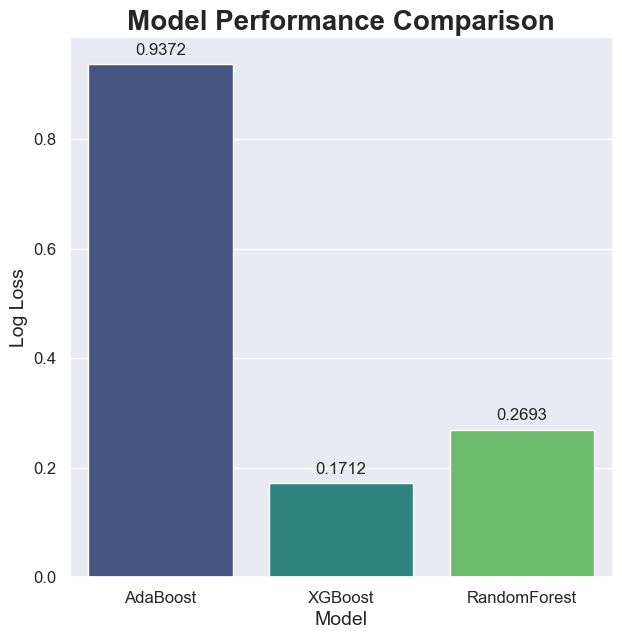

In [93]:
sns.set(style="darkgrid")
plt.figure(figsize=(7, 7))
ax = sns.barplot(x=model_names, y=log_losses, palette="viridis")
plt.title('Model Performance Comparison', fontsize=20, weight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)
# Show the plot
plt.show()

### **Model Evaluation**

In [70]:
# Use the best model to predict on test data
best_model = best_models[best_model_name]
y_pred = best_model.predict(X_test)
print(f"Predictions on test data using {best_model_name}: {y_pred}")

Predictions on test data using XGBoost: [0 2 2 ... 2 1 2]


In [71]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)
cr=classification_report(y_test, y_pred)
print("Classification report:\n",cr)

Accuracy: 0.9376954534520087
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1358
           1       0.98      0.99      0.99      1402
           2       0.93      0.90      0.91      1397

    accuracy                           0.94      4157
   macro avg       0.94      0.94      0.94      4157
weighted avg       0.94      0.94      0.94      4157



> **Interpretation:** The model achieved a high accuracy of 93.77%, with strong precision, recall, and f1-scores across all classes, indicating reliable and balanced performance in classifying the data.

#### **Classification Report**

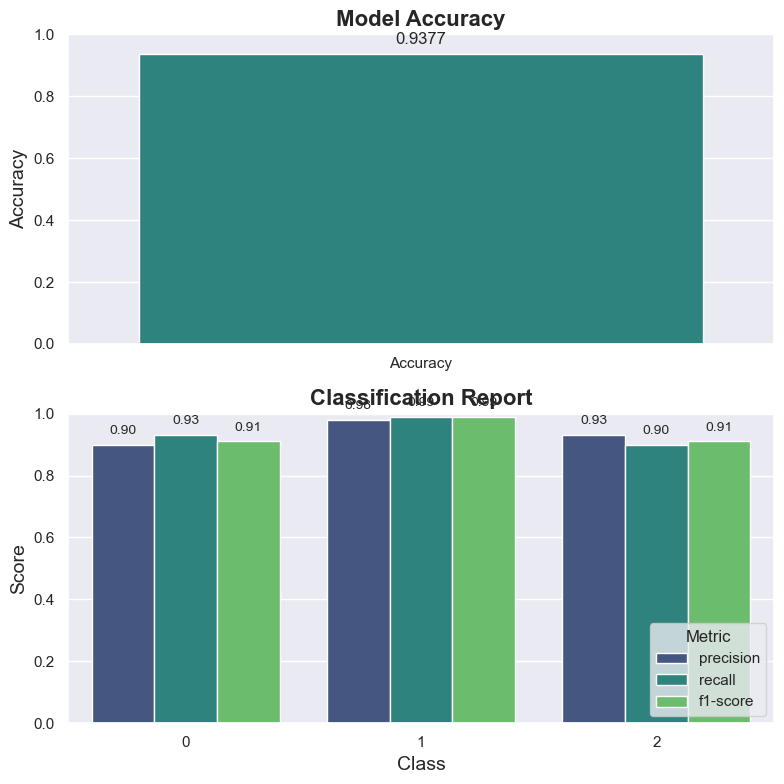

In [99]:
accuracy = 0.9377
classification_report = {
    'precision': [0.90, 0.98, 0.93],
    'recall': [0.93, 0.99, 0.90],
    'f1-score': [0.91, 0.99, 0.91],
    'support': [1358, 1402, 1397],
    'class': [0, 1, 2]
}

report_df = pd.DataFrame(classification_report)
sns.set(style="darkgrid")
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Accuracy bar
sns.barplot(x=['Accuracy'], y=[accuracy], ax=ax[0], palette='viridis')
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].set_title('Model Accuracy', fontsize=16, weight='bold')
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points',
                   fontsize=12)

# Classification report bars
report_df_melted = report_df.melt(id_vars='class', value_vars=['precision', 'recall', 'f1-score'], var_name='metric', value_name='score')
sns.barplot(x='class', y='score', hue='metric', data=report_df_melted, ax=ax[1], palette='viridis')
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('Score', fontsize=14)
ax[1].set_xlabel('Class', fontsize=14)
ax[1].set_title('Classification Report', fontsize=16, weight='bold')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points',
                   fontsize=10)

ax[1].legend(title='Metric', loc='lower right')

# Show plot
plt.tight_layout()
# plt.savefig('classification_report_visualization.png')
plt.show()

#### **Getting Predictions using Best Model**

In [73]:
y_test_pred=best_model.predict(test_processed)
prob2=best_model.predict_proba(test_processed)


#### **Feature Importance**

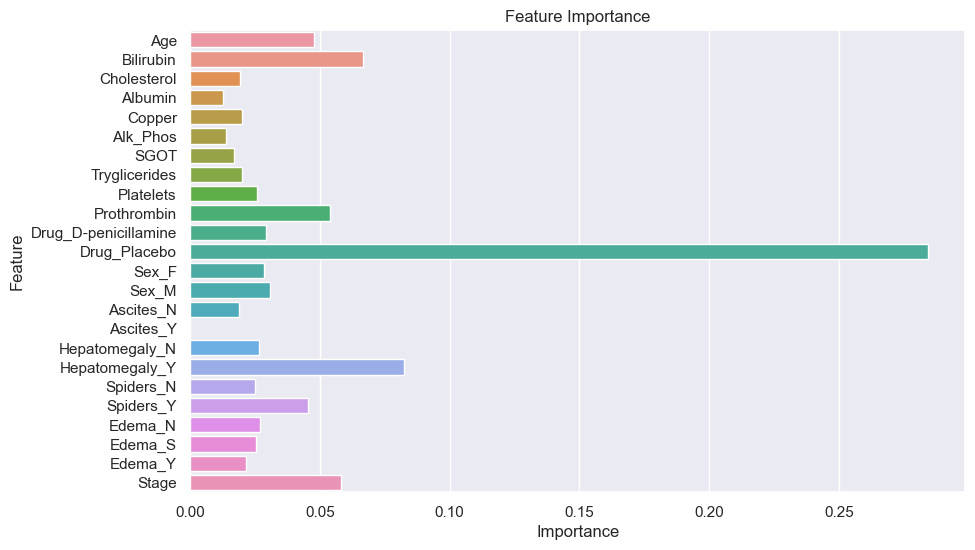

In [100]:
importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X_resampled.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### **Confusion Matrix**

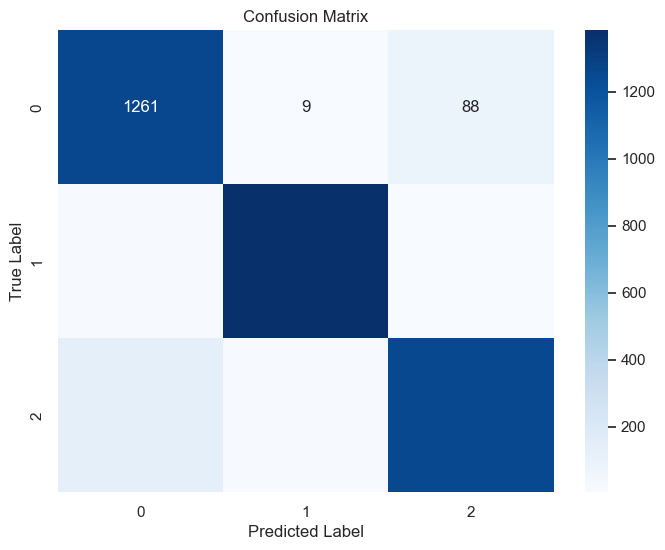

In [106]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### **Overall Interpretation:**

- `Class 0`: The model is generally good at predicting class 0, with some confusion with class 2.
- `Class 1`: The model performs very well for class 1, with minimal confusion with other classes.
- `Class 2`: The model also performs reasonably well for class 2 but has some confusion with class 0.

#### **Probability Distribution of Predictions**

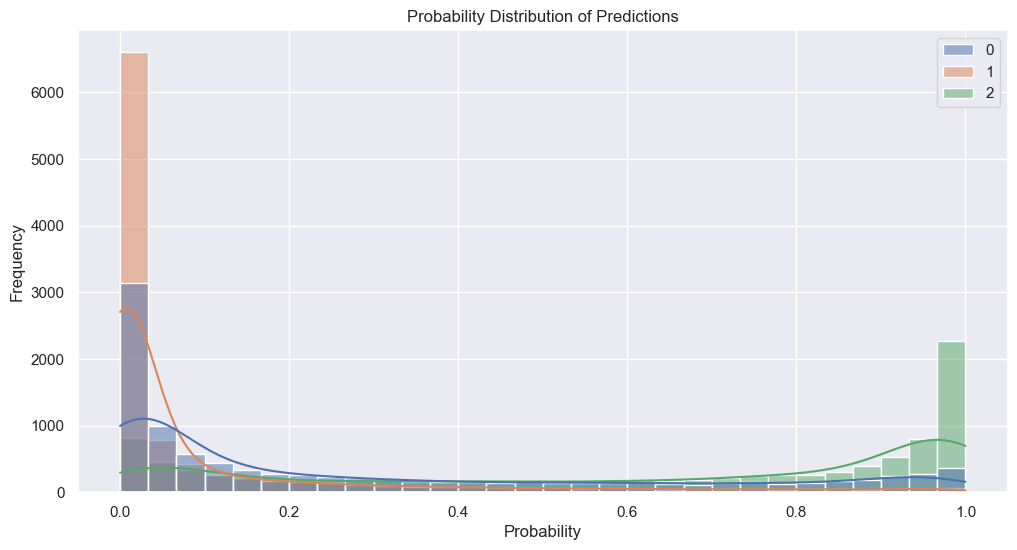

In [96]:
plt.figure(figsize=(12, 6))
sns.histplot(prob2, kde=True, bins=30)
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

##### **Interpretation:**

- **Clusters Around 0 and 1**:
	- If you see high peaks near 0 and 1, it indicates that the model is making confident predictions.

## **Getting Predictions on `Sample_submission.csv` File**

In [77]:
y_test_pred = best_model.predict_proba(test_processed)

# Apply min-max rescaling to predictions to avoid extremes
y_test_pred = np.clip(y_test_pred, 1e-15, 1 - 1e-15)
y_test_pred = y_test_pred / y_test_pred.sum(axis=1, keepdims=True)

# Prepare the submission file
submission = pd.DataFrame(y_test_pred, columns=sample_submission.columns[1:])
submission.insert(0, 'id', sample_submission['id'])
submission.to_csv('submission_final.csv', index=False)

In [112]:

from IPython.core.display import HTML

style = """
    <style>
        body {
            background-color: #f2fff2;
        }
        h1 {
            text-align: center;
            font-weight: bold;
            font-size: 36px;
            color: #4295F4;
            text-decoration: underline;
            padding-top: 15px;
        }
        
        h2 {
            text-align: left;
            font-weight: bold;
            font-size: 30px;
            color: #4A000A;
            text-decoration: underline;
            padding-top: 10px;
        }
        
        h3 {
            text-align: left;
            font-weight: bold;
            font-size: 30px;
            color: #f0081e;
            text-decoration: underline;
            padding-top: 5px;
        }

        
        p {
            text-align: center;
            font-size: 12 px;
            color: #0B9923;
        }
    </style>
"""

html_content = """
<h1>Hello</h1>
<p>Hello World</p>
<h2> Hello</h2>
<h3> World </h3>
"""

HTML(style + html_content)